# **PREDICTING THE TEN YEAR RISK OF DEVELOPING HEART DISEASE USING MACHINE LEARNING**

# INTRODUCTION

Coronary Heart Disease (CHD) remains a critical global health concern, responsible for a substantial portion of cardiovascular-related morbidity and mortality. Identifying individuals at risk of developing CHD is paramount for timely intervention and prevention efforts. This project aims to harness the power of data analysis and predictive modeling to better understand the factors associated with Ten-Year CHD risk and to build a reliable predictive model.

# Background

CHD is a complex, multifactorial condition influenced by a myriad of genetic, lifestyle, and medical factors. Understanding the interplay between these factors can significantly improve our ability to identify individuals at heightened risk. To achieve this, we are utilizing a comprehensive dataset encompassing various demographic, medical, and lifestyle-related variables.

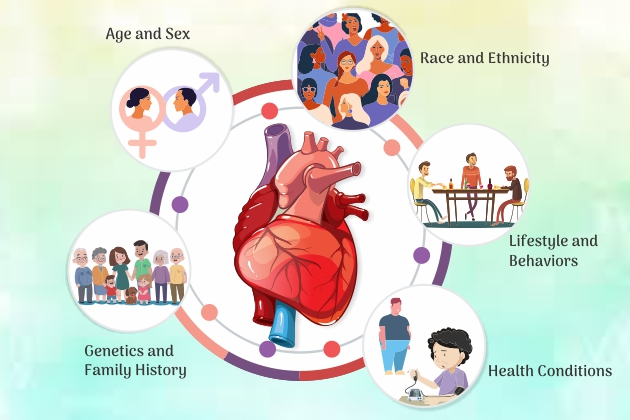

# Dataset Description

The dataset under investigation contains information on individuals, including features such as age, education level, gender, smoking status, and various health-related measurements (e.g., cholesterol levels, blood pressure, BMI, and glucose levels). The dataset also includes a crucial target variable, "TenYearCHD," which indicates whether an individual is at risk of developing CHD within the next ten years (1 for at risk, 0 for not at risk).

# Objectives

The primary objectives of this project are as follows:

1. Data Exploration: Conduct a thorough exploration of the dataset to understand its structure, identify missing values, and gain insights into the distribution of key variables.

2. Feature Analysis: Analyze the dataset's features to determine their suitability for predicting Ten-Year CHD risk. Categorize features as numeric, categorical, ordinal, or nominal.

3. Dependency Analysis: Employ statistical tests, including the Chi-squared test for categorical features and t-tests or ANOVA for numeric features, to assess the dependency of each feature on the Ten-Year CHD target variable.

4. Data Preprocessing: Prepare the dataset for modeling by handling missing values, encoding categorical variables, and scaling or normalizing numeric features.

5. Model Building: Develop predictive models using machine learning algorithms to predict Ten-Year CHD risk based on the selected features.

6. Model Evaluation: Assess the performance of the developed models using appropriate evaluation metrics (e.g., accuracy, precision, recall, ROC curve) to determine their predictive capability.

7. Interpretation: Interpret the results to identify the most influential factors contributing to Ten-Year CHD risk.


# Significance

This project's significance lies in its potential to contribute to early CHD risk assessment, which can enable targeted interventions and lifestyle modifications for at-risk individuals. Moreover, it underscores the importance of data-driven approaches in healthcare decision-making and highlights the relevance of predictive modeling in preventive medicine.

In the following sections, we will delve into the dataset, conduct rigorous analysis, build predictive models, and ultimately aim to enhance our understanding of the factors influencing Ten-Year CHD risk.



# importing necessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install imblearn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Analysis
import pandas as pd
import numpy as np


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go


#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3390 records and 16 attributes.

# Variables
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.

# Data Description
## Demographic:
Sex: male or female("M" or "F")

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education :1:Higher Secondary,2:Graduation,3:Post Graduation,4:PHD
##Behavioral
Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##Medical( history)
BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

##Medical(current)

Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

Glucose: glucose level (Continuous)

##Predict variable (desired target)

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# Loading and Exploring the Dataset


In [6]:
df=pd.read_csv("data_cardiovascular_risk.csv")

In [7]:
# First five rows
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [8]:
# checking random rows
df.sample(5)

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
1830  1830   39        2.0   M        YES        15.0     0.0   
1229  1229   54        2.0   F        YES        15.0     0.0   
2457  2457   54        3.0   M        YES        25.0     0.0   
1452  1452   43        4.0   M        YES        25.0     0.0   
148    148   55        1.0   M        YES        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1830                0             0         0    256.0  132.5   80.0  24.80   
1229                0             1         0    262.0  230.0  110.0  24.76   
2457                0             0         0    208.0  137.5   82.5  25.58   
1452                0             0         0    245.0  126.0   88.5  23.16   
148                 0             1         0    239.0  144.0   96.5  28.82   

      heartRate  glucose  TenYearCHD  
1830       75.0     97.0           0  
1229       93.0     97.0           0  
2457       75.0     63.0           1  
1452       92.0      NaN           1  
148        70.0    102.0           0

In [9]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Data Pre-Processing and Exploratory Data Analysis

# **A. Data distribution**

To visualize the dataset's distribution, we can create a histogram.

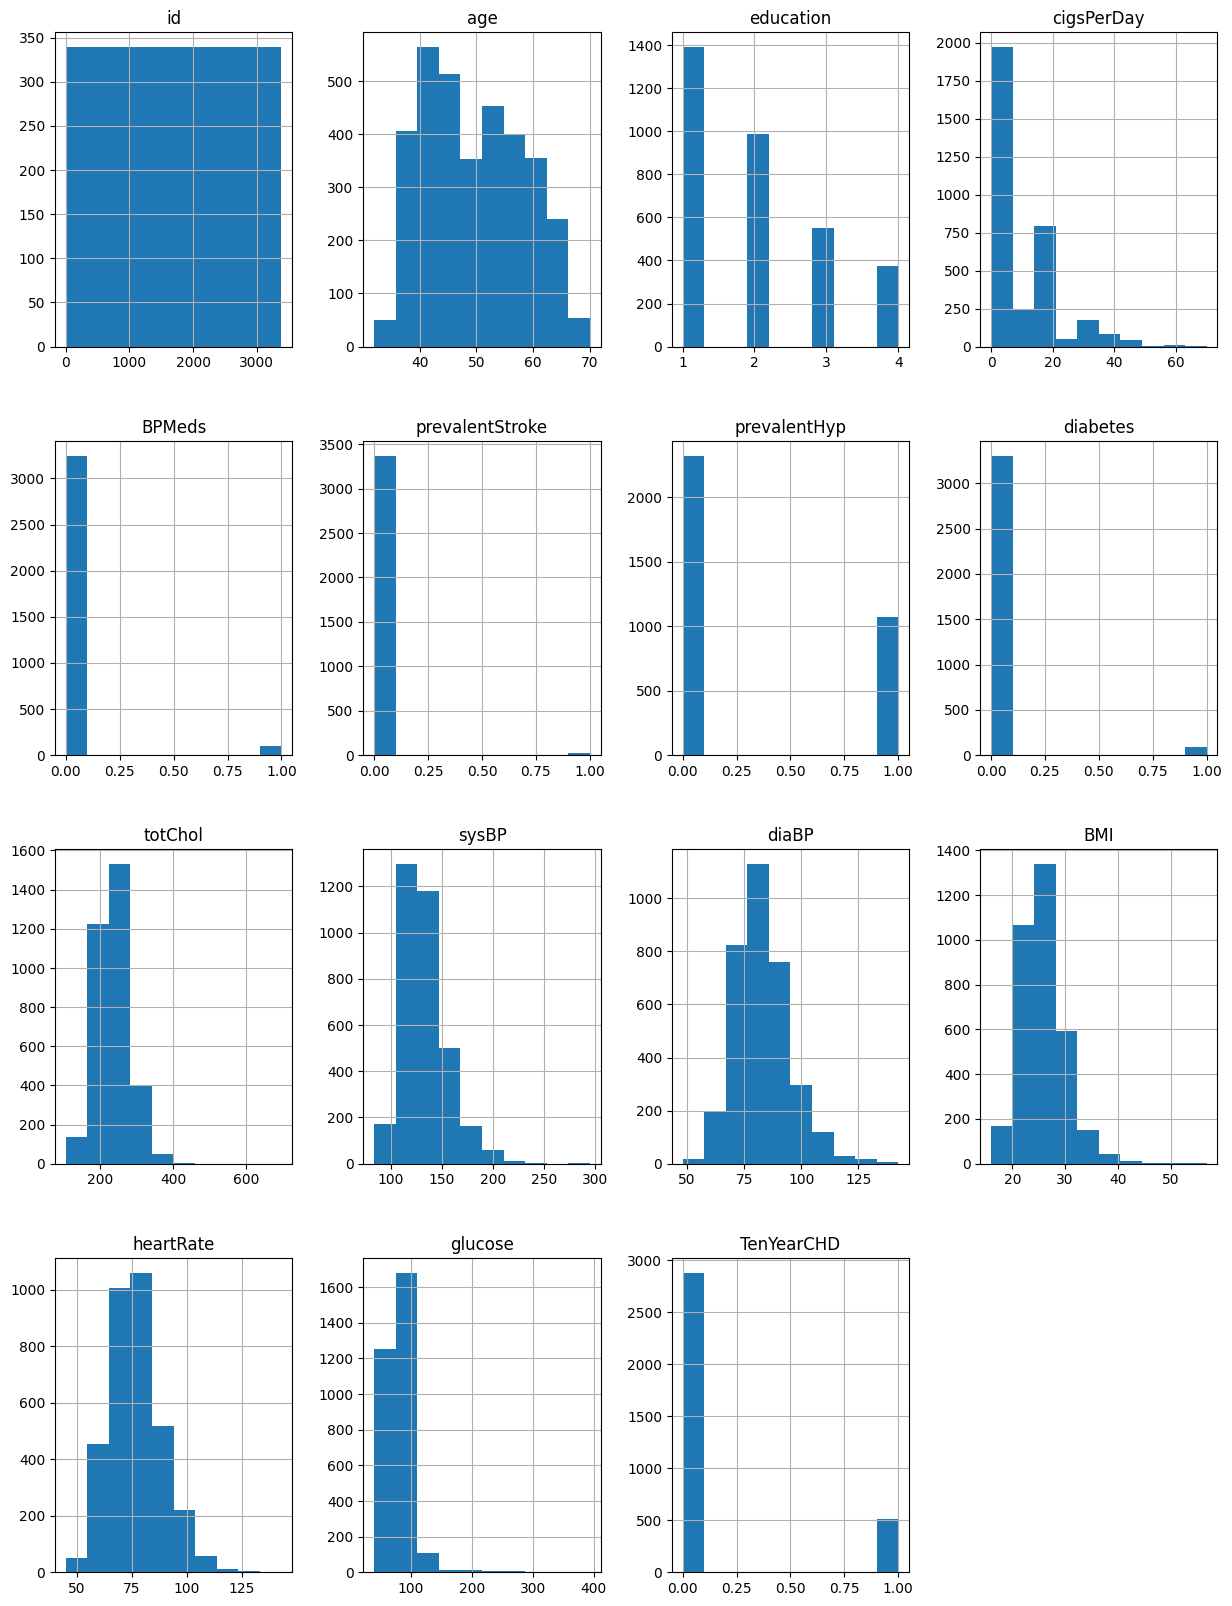

In [10]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
df.hist(ax = ax)
plt.show()

--> Age: It follows a normal distribution, indicating symmetrical variation among the age intervals.

--> Education: It exhibits a positively skewed distribution, suggesting a lack of symmetry in the data.

--> Total Cholesterol (totChol), Systolic Blood Pressure (sysBP), Diastolic Blood Pressure (diaBP), and BMI (Body Mass Index):
These variables follow a normal distribution, showing symmetrical differences, and no outliers are present in the data.

--> Heart rate and glucose levels follow a normal distribution, but outliers are present in the data.

--> Cigarettes Per Day (CigsPerDay): It is positively skewed.

--> Blood Pressure Medication (BPMeds), Prevalent Stroke, and Diabetes: These variables indicate the presence of outliers in the data.


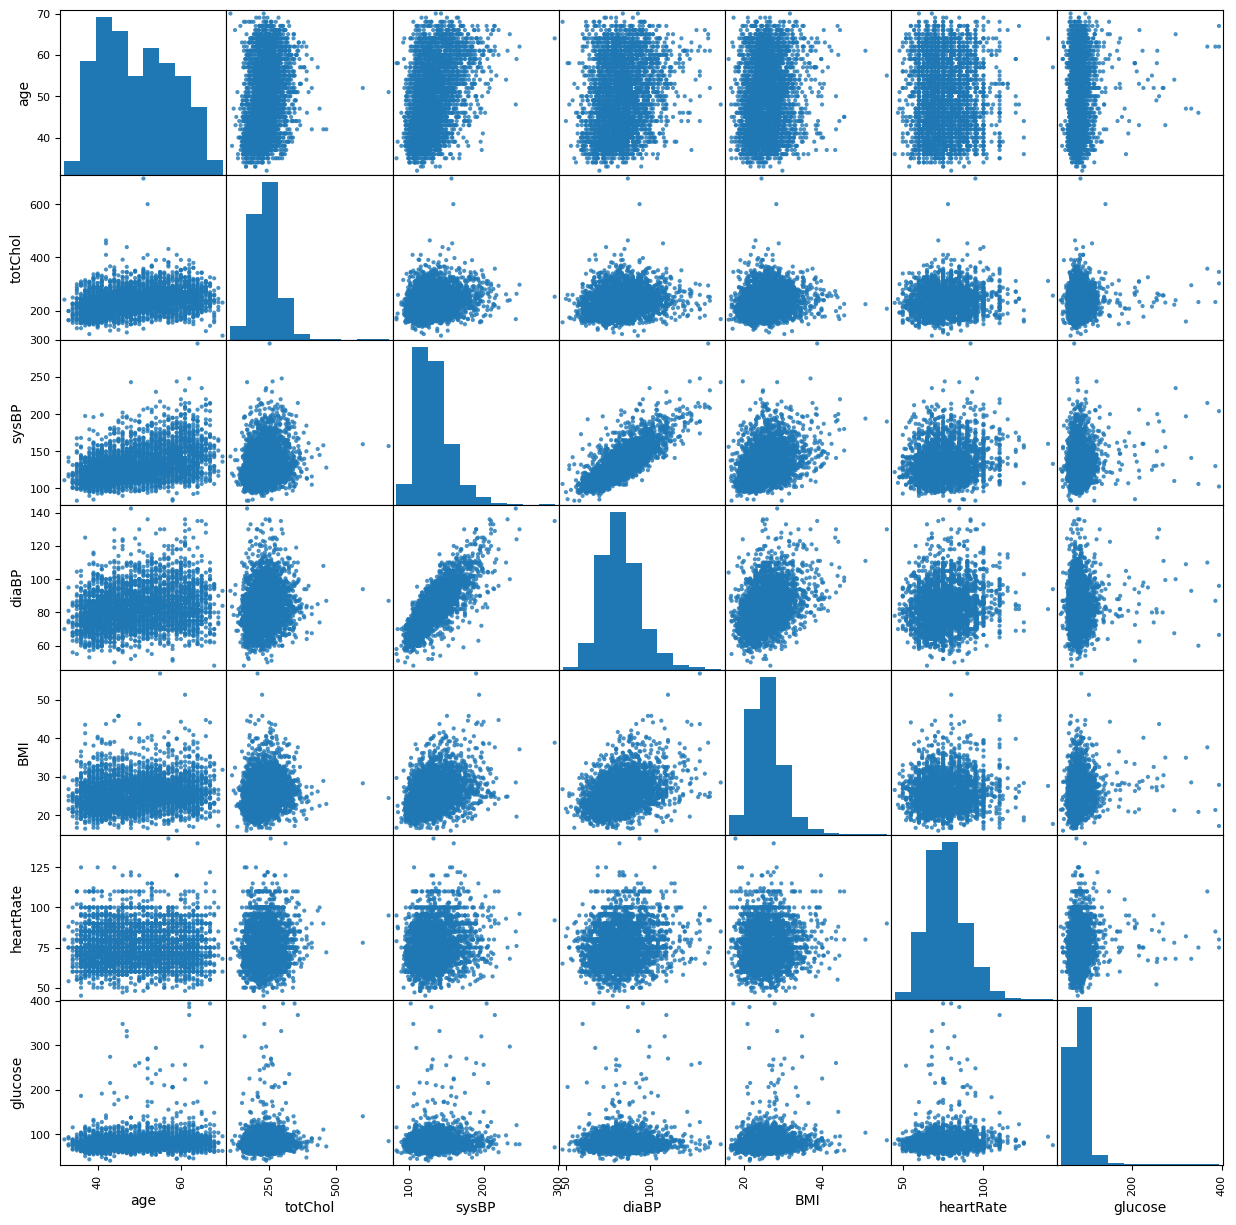

In [11]:
import matplotlib.pyplot as plt

# Define the features you want to include in the scatter plot
selected_features = ['age', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']

# Create a scatter plot for the selected features
pd.plotting.scatter_matrix(df[selected_features], alpha=0.8, figsize=(15, 15), diagonal='hist')

# Show the plot
plt.show()

# **B. Checking for Missing Values**

In [12]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.04%


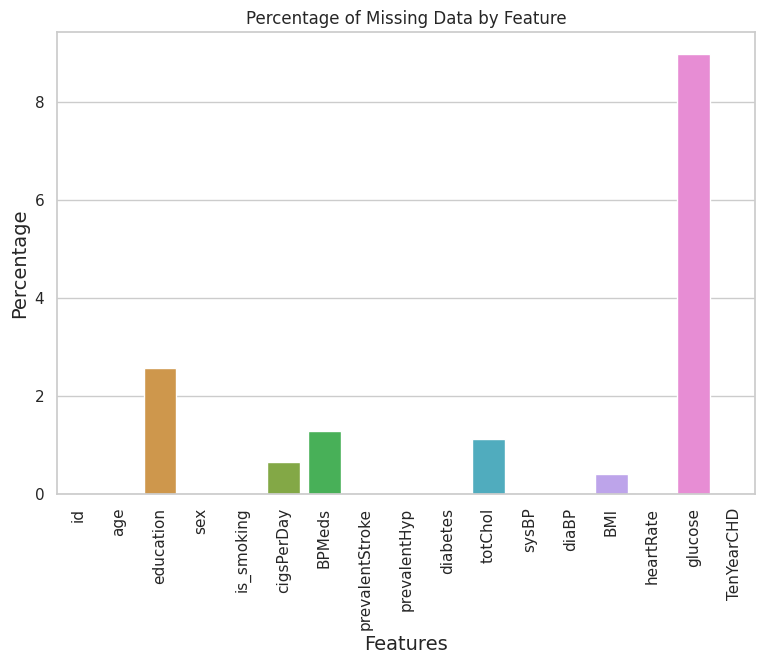

In [13]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The feature 'glucose' stands out with the highest missing data percentage, approximately 9%. While some other features have minimal missing data.

Imputing missing values, especially in a healthcare dataset like this, could introduce potential biases. Consulting with domain experts is crucial because healthcare data directly impacts individuals' lives, making it essential to proceed cautiously with any data imputation methods.

In [14]:
# Drop missing values
df.dropna(axis=0,inplace=True)

In [15]:
df.shape

(2927, 17)

# Case Counts

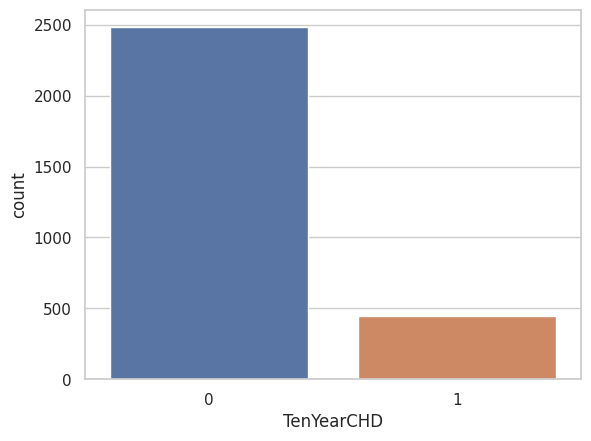

There are 2483 patients without heart disease and 444 patients with heart disease


In [16]:
sns.countplot(x="TenYearCHD",data=df)
plt.show()
cases=df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

The ratio of individuals without the disease to those with the disease is approximately 1:5.57, indicating a significant class imbalance. This imbalance should be considered when developing and evaluating predictive models, as it may impact the model's performance and interpretation.


In [17]:
df["age"].unique

<bound method Series.unique of 1       36
2       46
3       50
4       64
5       61
        ..
3384    61
3385    60
3386    46
3387    44
3389    54
Name: age, Length: 2927, dtype: int64>

In [18]:

df["age"].min()

32

In [19]:
df["age"].max()

70

In [20]:
# Ages range from 32 to 70 so that following age groups wil  be created
# *30-39 years
# *40-49years
# *50-59years
# *60-70 years

In [21]:
df["ageGroup"]=pd.cut(x=df['age'],bins=[30,39,49,59,70],labels=['30-39 years','40-49years','50-59years','60-70years'])
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD     ageGroup  
1           0  30-39 years  
2           0   40-49years  
3           1   50-59years  
4           0   60-70years  
5           1   60-70years

In summary, this step introduces a valuable categorical feature that classifies individuals into age groups. This enhancement facilitates the exploration of age-related patterns and relationships within the dataset, providing a clearer understanding of how age influences the data's dynamics.

In [22]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'ageGroup'],
      dtype='object')

In [23]:
categorical_features=['sex','education','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes', 'ageGroup']

In [24]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

sex :
F    1620
M    1307
Name: sex, dtype: int64
------------------
education :
1.0    1240
2.0     874
3.0     487
4.0     326
Name: education, dtype: int64
------------------
is_smoking :
NO     1480
YES    1447
Name: is_smoking, dtype: int64
------------------
BPMeds :
0.0    2839
1.0      88
Name: BPMeds, dtype: int64
------------------
prevalentStroke :
0    2909
1      18
Name: prevalentStroke, dtype: int64
------------------
prevalentHyp :
0    2007
1     920
Name: prevalentHyp, dtype: int64
------------------
diabetes :
0    2848
1      79
Name: diabetes, dtype: int64
------------------
ageGroup :
40-49years     1135
50-59years      911
60-70years      483
30-39 years     398
Name: ageGroup, dtype: int64
------------------


In [25]:
# Now for the continuous variables
numeric_features=["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]


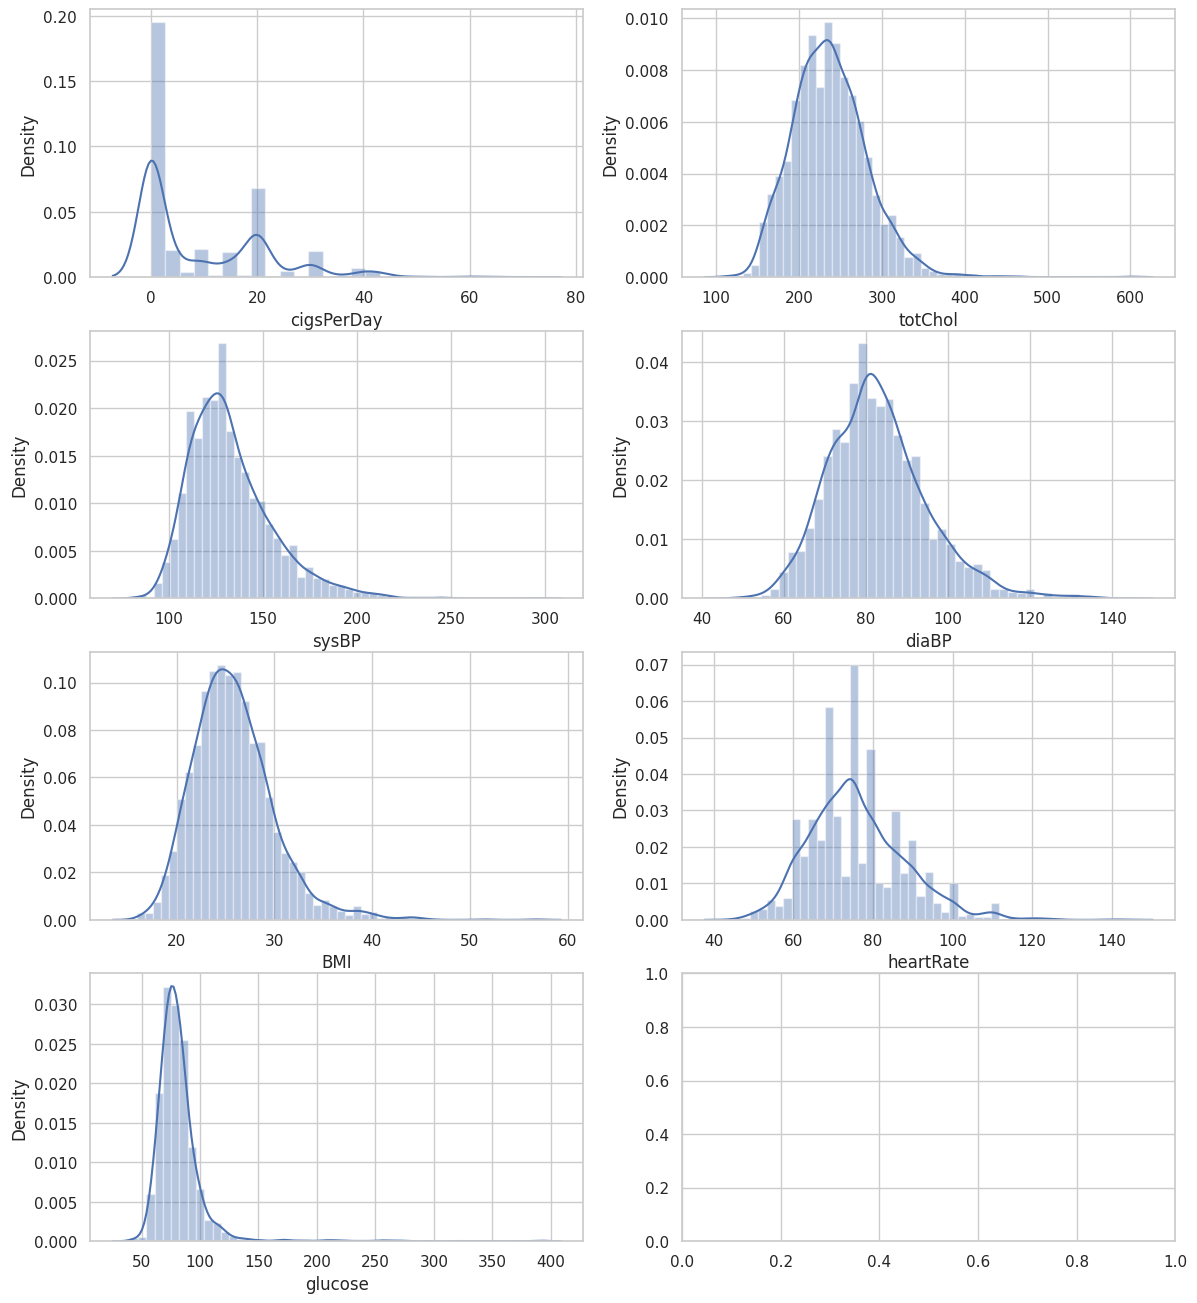

In [26]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

The variable 'Cigarettes Per Day (CigsPerDay)' exhibits a highly uneven distribution.

Similarly, 'Heart Rate' (heartRate) also displays an uneven distribution.

In contrast, 'Glucose' (glucose), 'BMI' (Body Mass Index), 'Diastolic Blood Pressure (diaBP)', 'Systolic Blood Pressure (sysBP)', and 'Total Cholesterol (totChol)' demonstrate more even distributions, resembling a normal distribution.

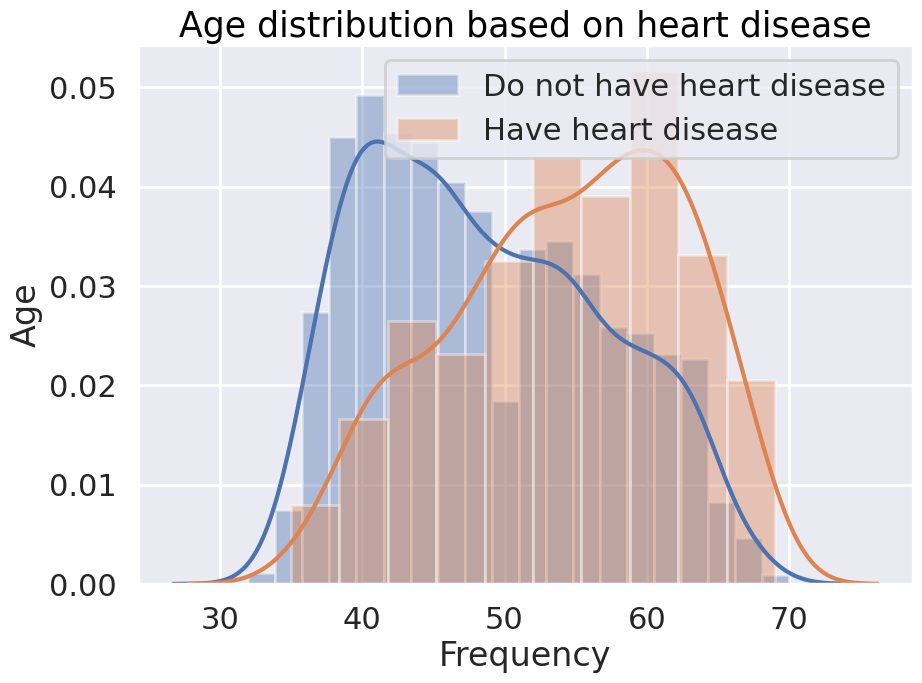

In [27]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(df[df['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.legend()
plt.show()

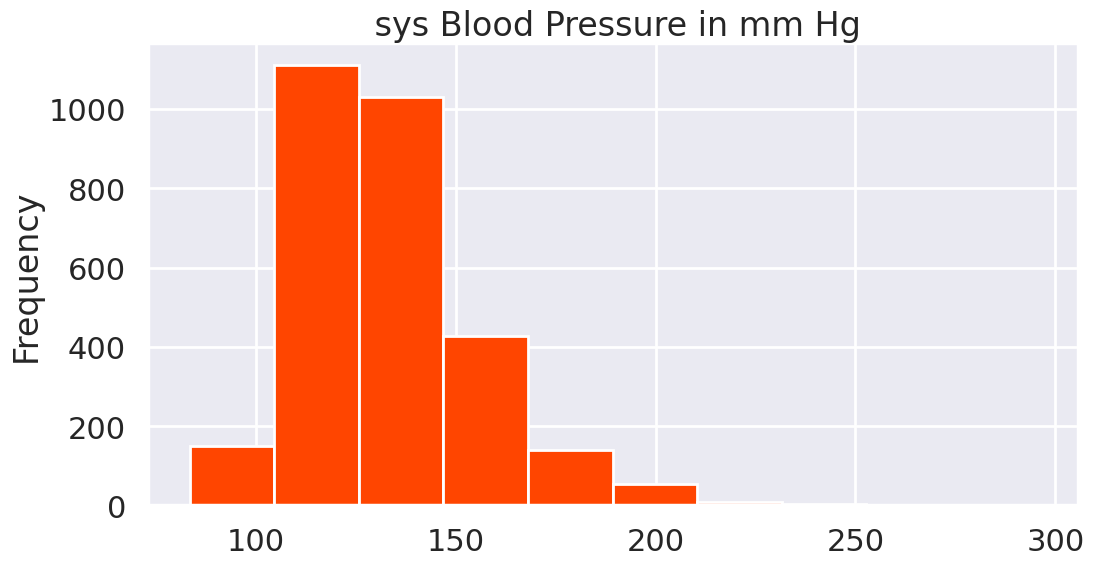

In [28]:

# Blood pressure distribution
df['sysBP'].plot(kind = 'hist', title = ' sys Blood Pressure in mm Hg', figsize = (12, 6), color='orangered')
plt.show()

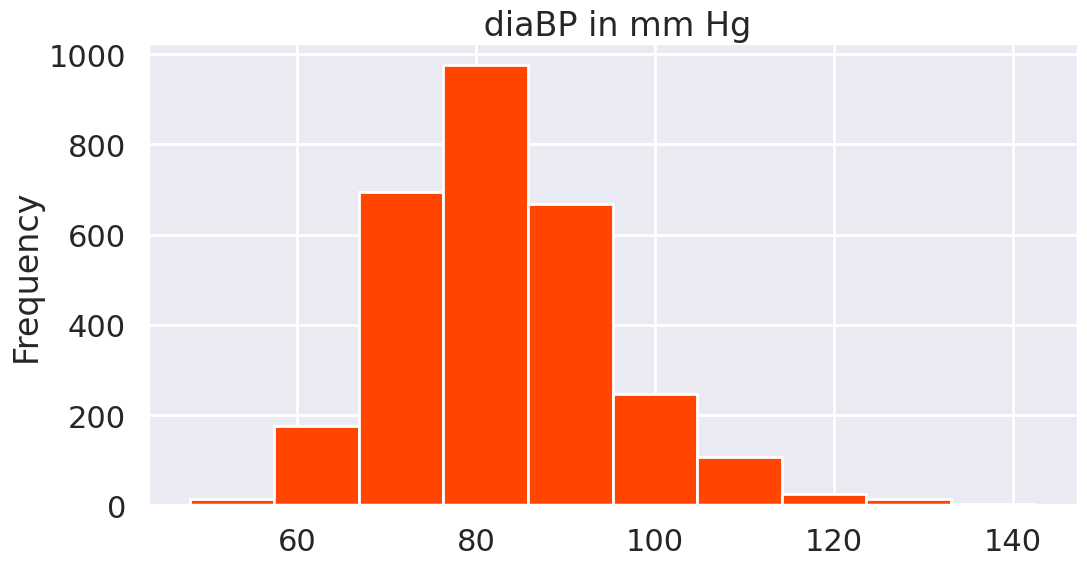

In [29]:
# Blood pressure distribution
df['diaBP'].plot(kind = 'hist', title = ' diaBP in mm Hg', figsize = (12, 6), color='orangered')
plt.show()

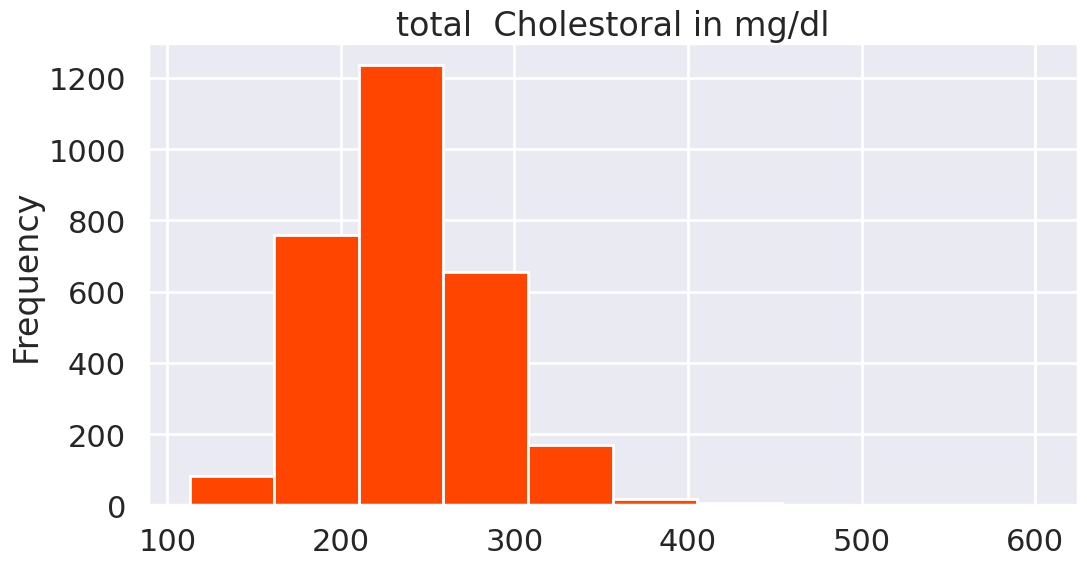

In [30]:
# Display cholestoral distribution
df['totChol'].plot(kind = 'hist', title = 'total  Cholestoral in mg/dl', figsize = (12, 6), color='orangered')
plt.show()

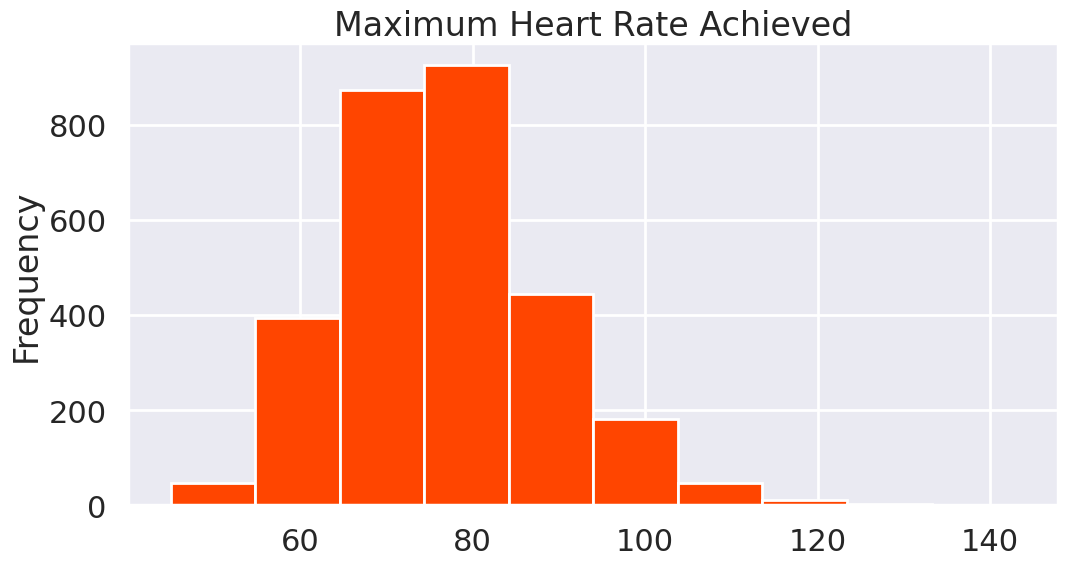

In [31]:
# Display maximum heart rate distribution
df['heartRate'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (12, 6), color='orangered')
plt.show()

# Which gender is more prone to heart disease?

In [32]:
df1=df.copy()
df1["gender"]=df1["sex"].map({"F":"female","M":"male"})
df1["TenYearCHD"]=df1["TenYearCHD"].map({0:"negative",1:"positive"})
df1["diabetes"]=df1["diabetes"].map({0:"negative",1:"positive"})
df1["education"]=df1["education"].map({1:"higher Secondary",2:"Graduation",3:"Post Graduation",4:"PHD"})
df1['is_smoking']=df1["is_smoking"].map({"YES":1,"NO":0})
df1.head()

id  age         education sex  is_smoking  cigsPerDay  BPMeds  \
1   1   36               PHD   M           0         0.0     0.0   
2   2   46  higher Secondary   F           1        10.0     0.0   
3   3   50  higher Secondary   M           1        20.0     0.0   
4   4   64  higher Secondary   F           1        30.0     0.0   
5   5   61   Post Graduation   F           0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1                0             1  negative    212.0  168.0   98.0  29.77   
2                0             0  negative    250.0  116.0   71.0  20.35   
3                0             1  negative    233.0  158.0   88.0  28.26   
4                0             0  negative    241.0  136.5   85.0  26.42   
5                0             1  negative    272.0  182.0  121.0  32.80   

   heartRate  glucose TenYearCHD     ageGroup  gender  
1       72.0     75.0   negative  30-39 years    male  
2       88.0     94.0   negative   40-49years  female  
3       68.0     94.0   positive   50-59years    male  
4       70.0     77.0   negative   60-70years  female  
5       85.0     65.0   positive   60-70years  female

In [33]:
df1["Count_10YCHD"] = 1
df1.head()

id  age         education sex  is_smoking  cigsPerDay  BPMeds  \
1   1   36               PHD   M           0         0.0     0.0   
2   2   46  higher Secondary   F           1        10.0     0.0   
3   3   50  higher Secondary   M           1        20.0     0.0   
4   4   64  higher Secondary   F           1        30.0     0.0   
5   5   61   Post Graduation   F           0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
1                0             1  negative    212.0  168.0   98.0  29.77   
2                0             0  negative    250.0  116.0   71.0  20.35   
3                0             1  negative    233.0  158.0   88.0  28.26   
4                0             0  negative    241.0  136.5   85.0  26.42   
5                0             1  negative    272.0  182.0  121.0  32.80   

   heartRate  glucose TenYearCHD     ageGroup  gender  Count_10YCHD  
1       72.0     75.0   negative  30-39 years    male             1  
2       88.0     94.0   negative   40-49years  female             1  
3       68.0     94.0   positive   50-59years    male             1  
4       70.0     77.0   negative   60-70years  female             1  
5       85.0     65.0   positive   60-70years  female             1

In [41]:
data_pv=df1.pivot_table("Count_10YCHD",["gender","TenYearCHD"],aggfunc="sum")
data_pv.head()

Count_10YCHD
gender TenYearCHD              
female negative            1417
       positive             203
male   negative            1066
       positive             241

In [40]:
fig1=px.bar(data_pv,x="gender",y="Count_10YCHD",color="TenYearCHD",color_discrete_sequence=['DodgerBlue','Crimson'],
            width=700,height=500)

# for_each_trace(lambda t:t.update(name=t.name.split("=")[1]))
fig1.update_layout(barmode="stack",title={"text":"Ten Year CHD probabilities by gender",
                   "x":0.5,
                   "xanchor":"center"})

fig1.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell",

    ),legend=dict(yanchor="top",
                  y=0.99,
                  xanchor="right",
                  x=0.99))

fig1.show()

From the above diagram, it's evident that there are more records for females compared to males in the dataset. However, when examining the distribution of positive cases for the past Ten-Year CHD risk, it becomes apparent that the number of males prone to CHD is higher than the number of positive cases among females who are at risk of CHD.

# **Is  educational level relevant?**

In [44]:
data_pv_ed = df1.pivot_table('Count_10YCHD', ['education', 'TenYearCHD'], aggfunc="sum")
data_pv_ed

Count_10YCHD
education        TenYearCHD              
Graduation       negative             766
                 positive             108
PHD              negative             282
                 positive              44
Post Graduation  negative             426
                 positive              61
higher Secondary negative            1009
                 positive             231

In [43]:
fig2 = px.bar(data_pv_ed, x="education", y = 'Count_10YCHD', color='TenYearCHD',
              color_discrete_sequence=['DodgerBlue', 'Crimson'],
              width=700, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig2.update_layout(barmode='stack', title={'text': 'Ten Year CHD Probabilities by Education Level',
                                           'x':0.5,
                                           'xanchor': 'center'})
fig2.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig2.show()

It's important to emphasize that correlation does not imply causation. While there appears to be a higher incidence of heart disease in the group with lower educational levels, it's essential to investigate the underlying causes for this observation.

This dataset includes patients from the USA, a country where not everyone has equal access to healthcare. Individuals with lower educational levels may be more likely to lack access to healthcare due to their social statuses, potentially contributing to the observed correlation with heart disease. Further analysis and domain-specific research are needed for better understanding.

# Which age and gendergroup smoke more?

In [45]:
df1["is_smoking"].value_counts()

0    1480
1    1447
Name: is_smoking, dtype: int64

In [52]:
data_gp_cs = df1.pivot_table('is_smoking', ['gender', 'ageGroup'], aggfunc="sum")
data_gp_cs.head(10)

is_smoking
gender ageGroup               
female 30-39 years         116
       40-49years          309
       50-59years          158
       60-70years           55
male   30-39 years         120
       40-49years          354
       50-59years          236
       60-70years           99

In [51]:
fig3 = px.bar(data_gp_cs, x= 'ageGroup', y="is_smoking", color='gender',
              color_discrete_sequence=['firebrick', 'dimgray' ],
              width=900, height=600)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig3.update_layout(barmode='stack', title={'text': 'Number of Current Smokers by Gender and Age Group',
                                           'x':0.5,
                                           'xanchor': 'center'})
fig3.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

fig3.show()

Based on the analysis, it is evident that men tend to smoke more compared to women. Additionally, the age group of 40-49 years appears to have a higher prevalence of smoking when compared to other age groups.

# Checking the realtion between some health conditions(diabetes,hypertension,stroke ) in the incidence of heart disease.

In [55]:
data_conditions = df1.pivot_table("Count_10YCHD",["diabetes",'prevalentStroke','prevalentHyp','TenYearCHD'],aggfunc="sum").reset_index()
data_conditions["diabetes"]=data_conditions['diabetes'].replace(["positive","negative"],["Diabetic","Non-Diabetic"])
data_conditions['prevalentHyp']=data_conditions['prevalentHyp'].replace([0,1],['Not Hypertensive', 'Hypertensive'])
data_conditions['prevalentStroke']=data_conditions['prevalentStroke'].replace([0,1],['Never had a stroke', 'Has had a stroke'])
data_conditions.head(14)

diabetes     prevalentStroke      prevalentHyp TenYearCHD  \
0   Non-Diabetic  Never had a stroke  Not Hypertensive   negative   
1   Non-Diabetic  Never had a stroke  Not Hypertensive   positive   
2   Non-Diabetic  Never had a stroke      Hypertensive   negative   
3   Non-Diabetic  Never had a stroke      Hypertensive   positive   
4   Non-Diabetic    Has had a stroke  Not Hypertensive   negative   
5   Non-Diabetic    Has had a stroke  Not Hypertensive   positive   
6   Non-Diabetic    Has had a stroke      Hypertensive   negative   
7   Non-Diabetic    Has had a stroke      Hypertensive   positive   
8       Diabetic  Never had a stroke  Not Hypertensive   negative   
9       Diabetic  Never had a stroke  Not Hypertensive   positive   
10      Diabetic  Never had a stroke      Hypertensive   negative   
11      Diabetic  Never had a stroke      Hypertensive   positive   
12      Diabetic    Has had a stroke      Hypertensive   positive   

    Count_10YCHD  
0           1753  
1            212  
2            669  
3            197  
4              5  
5              1  
6              6  
7              5  
8             27  
9              9  
10            23  
11            19  
12             1

In [59]:
data_hyp = data_conditions.groupby(['prevalentHyp', 'TenYearCHD']).sum()
data_hyp.head()

Count_10YCHD
prevalentHyp     TenYearCHD              
Hypertensive     negative             698
                 positive             222
Not Hypertensive negative            1785
                 positive             222

In [58]:
fig4 = px.bar(data_hyp, x= 'TenYearCHD', y="Count_10YCHD", color='prevalentHyp',
              color_discrete_sequence=['yellow', 'midnightblue' ],
              width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig4.update_layout(barmode='stack', title={'text': 'Prevalent Hypertension and Probability of CHD',
                                           'x':0.5,
                                           'xanchor': 'center'})
fig4.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig4.show()

Individuals with hypertension appear to be more susceptible to Ten-Year CHD risk, as evidenced by the higher number of cases. Specifically, there are 222 individuals with hypertension who are at risk of Ten-Year CHD, which is notably higher than the number of cases among non-hypertensive individuals.

In [62]:
data_dia = data_conditions.groupby(['diabetes', 'TenYearCHD']).sum()
data_dia.head()

Count_10YCHD
diabetes     TenYearCHD              
Diabetic     negative              50
             positive              29
Non-Diabetic negative            2433
             positive             415

In [61]:
fig5 = px.bar(data_dia, x= 'TenYearCHD', y="Count_10YCHD", color='diabetes',
              color_discrete_sequence=['yellow', 'midnightblue' ],
              width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig5.update_layout(barmode='stack', title={'text': 'Diabetes and Probability of CHD',
                                           'x':0.5,
                                           'xanchor': 'center'})
fig5.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig5.show()

Indeed, individuals with diabetes appear to have a lower susceptibility to the risk of Ten-Year CHD when compared to those without diabetes, as evidenced by the data presented in the figure above.

In [65]:
data_str = data_conditions.groupby(['prevalentStroke', 'TenYearCHD']).sum()
data_str.head()

Count_10YCHD
prevalentStroke    TenYearCHD              
Has had a stroke   negative              11
                   positive               7
Never had a stroke negative            2472
                   positive             437

In [64]:
fig6 = px.bar(data_str, x= 'TenYearCHD', y="Count_10YCHD", color='prevalentStroke',
              color_discrete_sequence=['yellow', 'midnightblue' ],
              width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig6.update_layout(barmode='stack', title={'text': 'Prevalent Stroke and Probability of CHD',
                                           'x':0.5,
                                           'xanchor': 'center'})
fig6.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig6.show()

Indeed, individuals with diabetes appear to have a lower susceptibility to the risk of Ten-Year CHD when compared to those without diabetes, as evidenced by the data presented in the figure above.

# BMI, Cholesterol, Glucose and heart rate levels by age group

In [66]:
fig7 = px.box(df1, x="ageGroup", y="totChol", color_discrete_sequence=['DarkTurquoise'], width=900, height=600)
fig7.update_layout(
    title={
        'text': "Total Cholesterol by age group",
        'x':0.5,
        'xanchor': 'center'})

fig7.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
fig7.show()

The total cholesterol (totChol) levels appear to increase as we move from lower age groups to higher age groups.

In [67]:
fig8 = px.box(df1, x="ageGroup", y="BMI",color_discrete_sequence=['Coral'], width=900, height=600)
fig8.update_layout(
    title={
        'text': "BMI by age group",
        'x':0.5,
        'xanchor': 'center'})
fig8.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
fig8.show()

The BMI (Body Mass Index) variable exhibits a substantial number of outliers, as prominently visible in the figure above. These outliers indicate extreme values in the BMI data that deviate significantly from the majority of the observations. Understanding and addressing these outliers is crucial for accurate analysis and modeling.

In [68]:
fig9 = px.box(df1, x="ageGroup", y="glucose", color_discrete_sequence=['Navy'], width=900, height=600)
fig9.update_layout(
    title={
        'text': "Glucose by age group",
        'x':0.5,
        'xanchor': 'center'})
fig9.show()

The median of blood glucose levels consistently falls within the range of 77-81 across various age groups, as depicted in the figure above. This finding suggests a relatively stable central tendency for blood glucose measurements, with minimal variation observed among different age groups.

In [69]:
fig10 = px.box(df1, x="ageGroup", y="heartRate", color_discrete_sequence=['MediumVioletRed'], width=900, height=600)
fig10.update_layout(
    title={
        'text': "Heart rate by age group",
        'x':0.5,
        'xanchor': 'center'})
fig10.show()

The heart rate for individuals belonging to different age groups falls within a relatively narrow range of 73-75, indicating a consistent pattern of heart rate measurements across various age categories. This observation suggests that heart rate values do not exhibit significant variations among different age groups in the dataset.

In [70]:
trace0 = go.Box(x=df1['ageGroup'],y=df1['sysBP'],
                name='Systolic Blood Pressure', line=dict(color='steelblue'))
trace1 = go.Box(x=df1['ageGroup'], y=df1['diaBP'],
                name='Diastolic Blood Pressure', line=dict(color='goldenrod'))

fig11 = go.Figure([trace0, trace1])
fig11.update_layout(
    title={
        'text': "Blood Pressure by Age Group",
        'x':0.5,
        'xanchor': 'center'})
fig11.show()

The presence of numerous outliers in various age groups for both systolic blood pressure (sysBP) and diastolic blood pressure (diaBP) is a noteworthy observation with significant implications for our risk prediction analysis. These outliers represent extreme values in blood pressure measurements within different age categories and can provide valuable insights into potential risk factors or anomalies that may impact the predictive modeling process. It is essential to carefully consider and address these outliers to ensure the robustness and accuracy of our risk prediction models.

# Statistics on the variables

In [71]:
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  2927.000000  2927.000000  2927.000000  2927.000000  2927.000000   
mean   1692.869833    49.507345     1.965494     9.112743     0.030065   
std     986.025198     8.597191     1.017199    11.882784     0.170795   
min       1.000000    32.000000     1.000000     0.000000     0.000000   
25%     836.500000    42.000000     1.000000     0.000000     0.000000   
50%    1689.000000    49.000000     2.000000     0.000000     0.000000   
75%    2547.500000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      2927.000000   2927.000000  2927.000000  2927.000000  2927.000000   
mean          0.006150      0.314315     0.026990   237.129142   132.626409   
std           0.078192      0.464322     0.162082    44.613282    22.326197   
min           0.000000      0.000000     0.000000   113.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   117.000000   
50%           0.000000      0.000000     0.000000   234.000000   128.500000   
75%           0.000000      1.000000     0.000000   264.000000   144.000000   
max           1.000000      1.000000     1.000000   600.000000   295.000000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  2927.000000  2927.000000  2927.000000  2927.000000  2927.000000  
mean     82.906218    25.797041    75.888282    81.934404     0.151691  
std      12.078873     4.130376    11.971207    24.106943     0.358783  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.030000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

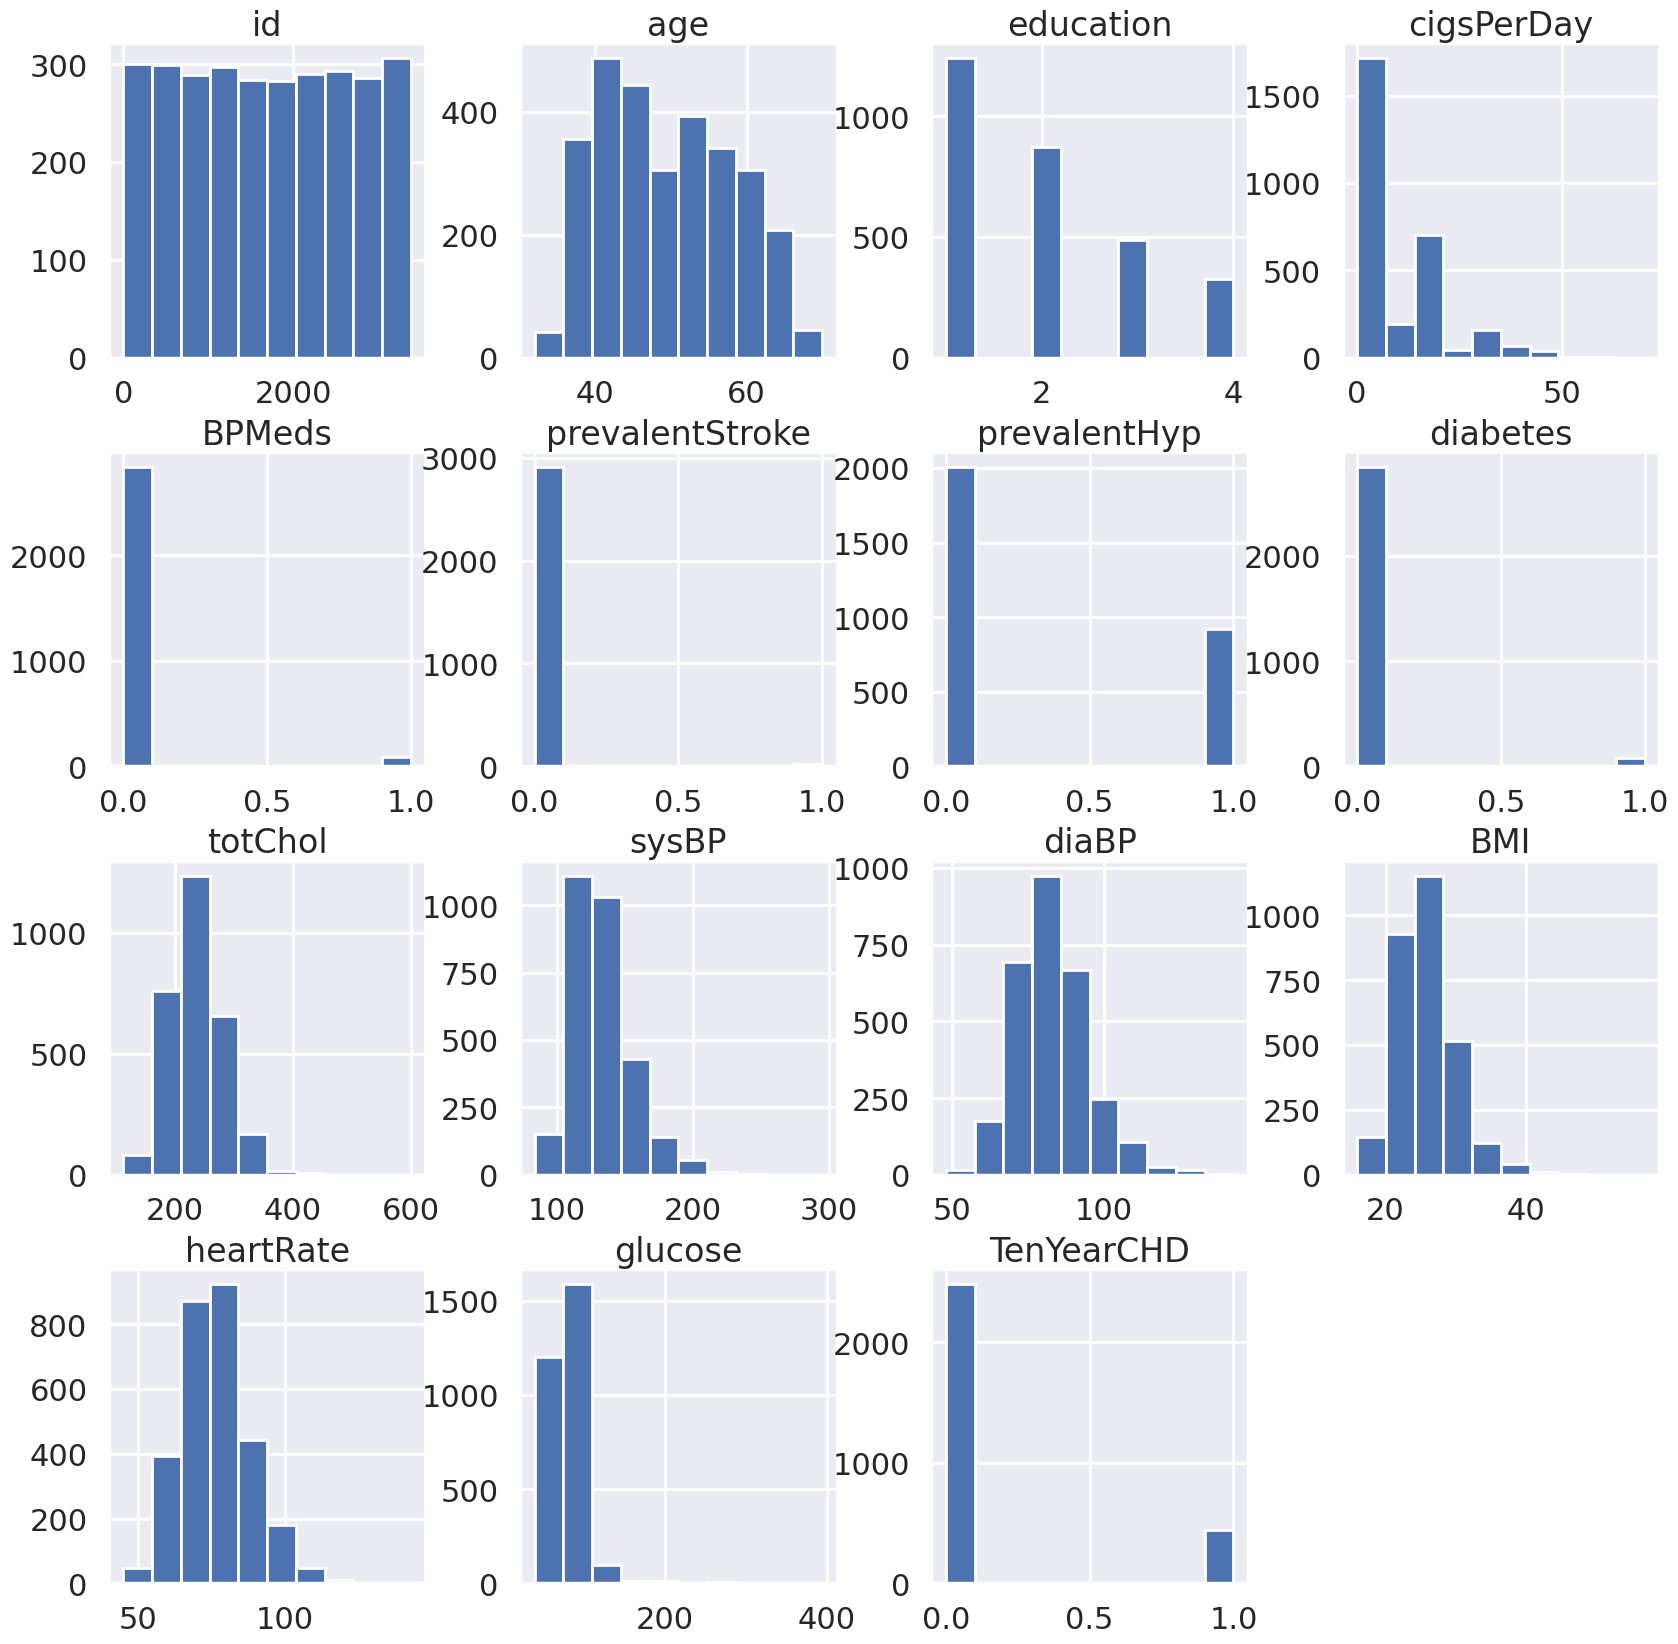

In [72]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
df.hist(ax=ax);

--> The study's participants have an average age of 49 years, with the youngest participant being 32 years old and the oldest reaching 70 years.

--> Among the participants who smoke, the highest recorded number of cigarettes smoked is a remarkable 70.

--> The mean BMI (Body Mass Index) is 25. It's worth noting that BMI levels above 25 but below 30 are typically categorized as overweight, while individuals with BMI values exceeding 30 are considered obese.

--> The average glucose level is 81, which falls within the range of normal glucose levels, indicating a healthy distribution of glucose measurements among the study participants.

# Checking the target variable

In [73]:
df["TenYearCHD"].value_counts(normalize=True)

0    0.848309
1    0.151691
Name: TenYearCHD, dtype: float64

In [74]:
# 15% of the data indicative for positive disease in the near future

## Correlation matrix

In [75]:
correlations = df.corr()
correlations

id       age  education  cigsPerDay    BPMeds  \
id               1.000000  0.024679  -0.029438   -0.031746  0.014426   
age              0.024679  1.000000  -0.161238   -0.184110  0.138570   
education       -0.029438 -0.161238   1.000000    0.015506 -0.023534   
cigsPerDay      -0.031746 -0.184110   0.015506    1.000000 -0.036866   
BPMeds           0.014426  0.138570  -0.023534   -0.036866  1.000000   
prevalentStroke -0.034277  0.049756  -0.027410   -0.047461  0.114107   
prevalentHyp     0.022882  0.313543  -0.082675   -0.080570  0.260039   
diabetes         0.004331  0.111085  -0.054464   -0.048959  0.069443   
totChol         -0.015428  0.281156  -0.011575   -0.026606  0.098210   
sysBP            0.030634  0.405238  -0.130417   -0.105104  0.280788   
diaBP            0.004233  0.231322  -0.056034   -0.067483  0.206209   
BMI              0.033410  0.141001  -0.131304   -0.095310  0.088962   
heartRate        0.027590  0.013947  -0.061501    0.055770  0.014681   
glucose          0.011366  0.108882  -0.034099   -0.064029  0.069125   
TenYearCHD       0.010901  0.234423  -0.062442    0.059797  0.092868   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
id                     -0.034277      0.022882  0.004331 -0.015428  0.030634   
age                     0.049756      0.313543  0.111085  0.281156  0.405238   
education              -0.027410     -0.082675 -0.054464 -0.011575 -0.130417   
cigsPerDay             -0.047461     -0.080570 -0.048959 -0.026606 -0.105104   
BPMeds                  0.114107      0.260039  0.069443  0.098210  0.280788   
prevalentStroke         1.000000      0.059703  0.013866  0.002418  0.061712   
prevalentHyp            0.059703      1.000000  0.082510  0.162100  0.699240   
diabetes                0.013866      0.082510  1.000000  0.069232  0.108990   
totChol                 0.002418      0.162100  0.069232  1.000000  0.210685   
sysBP                   0.061712      0.699240  0.108990  0.210685  1.000000   
diaBP                   0.059594      0.612037  0.058115  0.165101  0.783586   
BMI                     0.029168      0.304790  0.090249  0.113206  0.340782   
heartRate              -0.018617      0.154375  0.046822  0.091487  0.180690   
glucose                 0.021427      0.086143  0.617189  0.066703  0.134609   
TenYearCHD              0.052014      0.169136  0.100006  0.106473  0.217419   

                    diaBP       BMI  heartRate   glucose  TenYearCHD  
id               0.004233  0.033410   0.027590  0.011366    0.010901  
age              0.231322  0.141001   0.013947  0.108882    0.234423  
education       -0.056034 -0.131304  -0.061501 -0.034099   -0.062442  
cigsPerDay      -0.067483 -0.095310   0.055770 -0.064029    0.059797  
BPMeds           0.206209  0.088962   0.014681  0.069125    0.092868  
prevalentStroke  0.059594  0.029168  -0.018617  0.021427    0.052014  
prevalentHyp     0.612037  0.304790   0.154375  0.086143    0.169136  
diabetes         0.058115  0.090249   0.046822  0.617189    0.100006  
totChol          0.165101  0.113206   0.091487  0.066703    0.106473  
sysBP            0.783586  0.340782   0.180690  0.134609    0.217419  
diaBP            1.000000  0.391291   0.173350  0.074630    0.139005  
BMI              0.391291  1.000000   0.076848  0.091094    0.075950  
heartRate        0.173350  0.076848   1.000000  0.089920    0.018747  
glucose          0.074630  0.091094   0.089920  1.000000    0.133286  
TenYearCHD       0.139005  0.075950   0.018747  0.133286    1.000000

<Axes: >

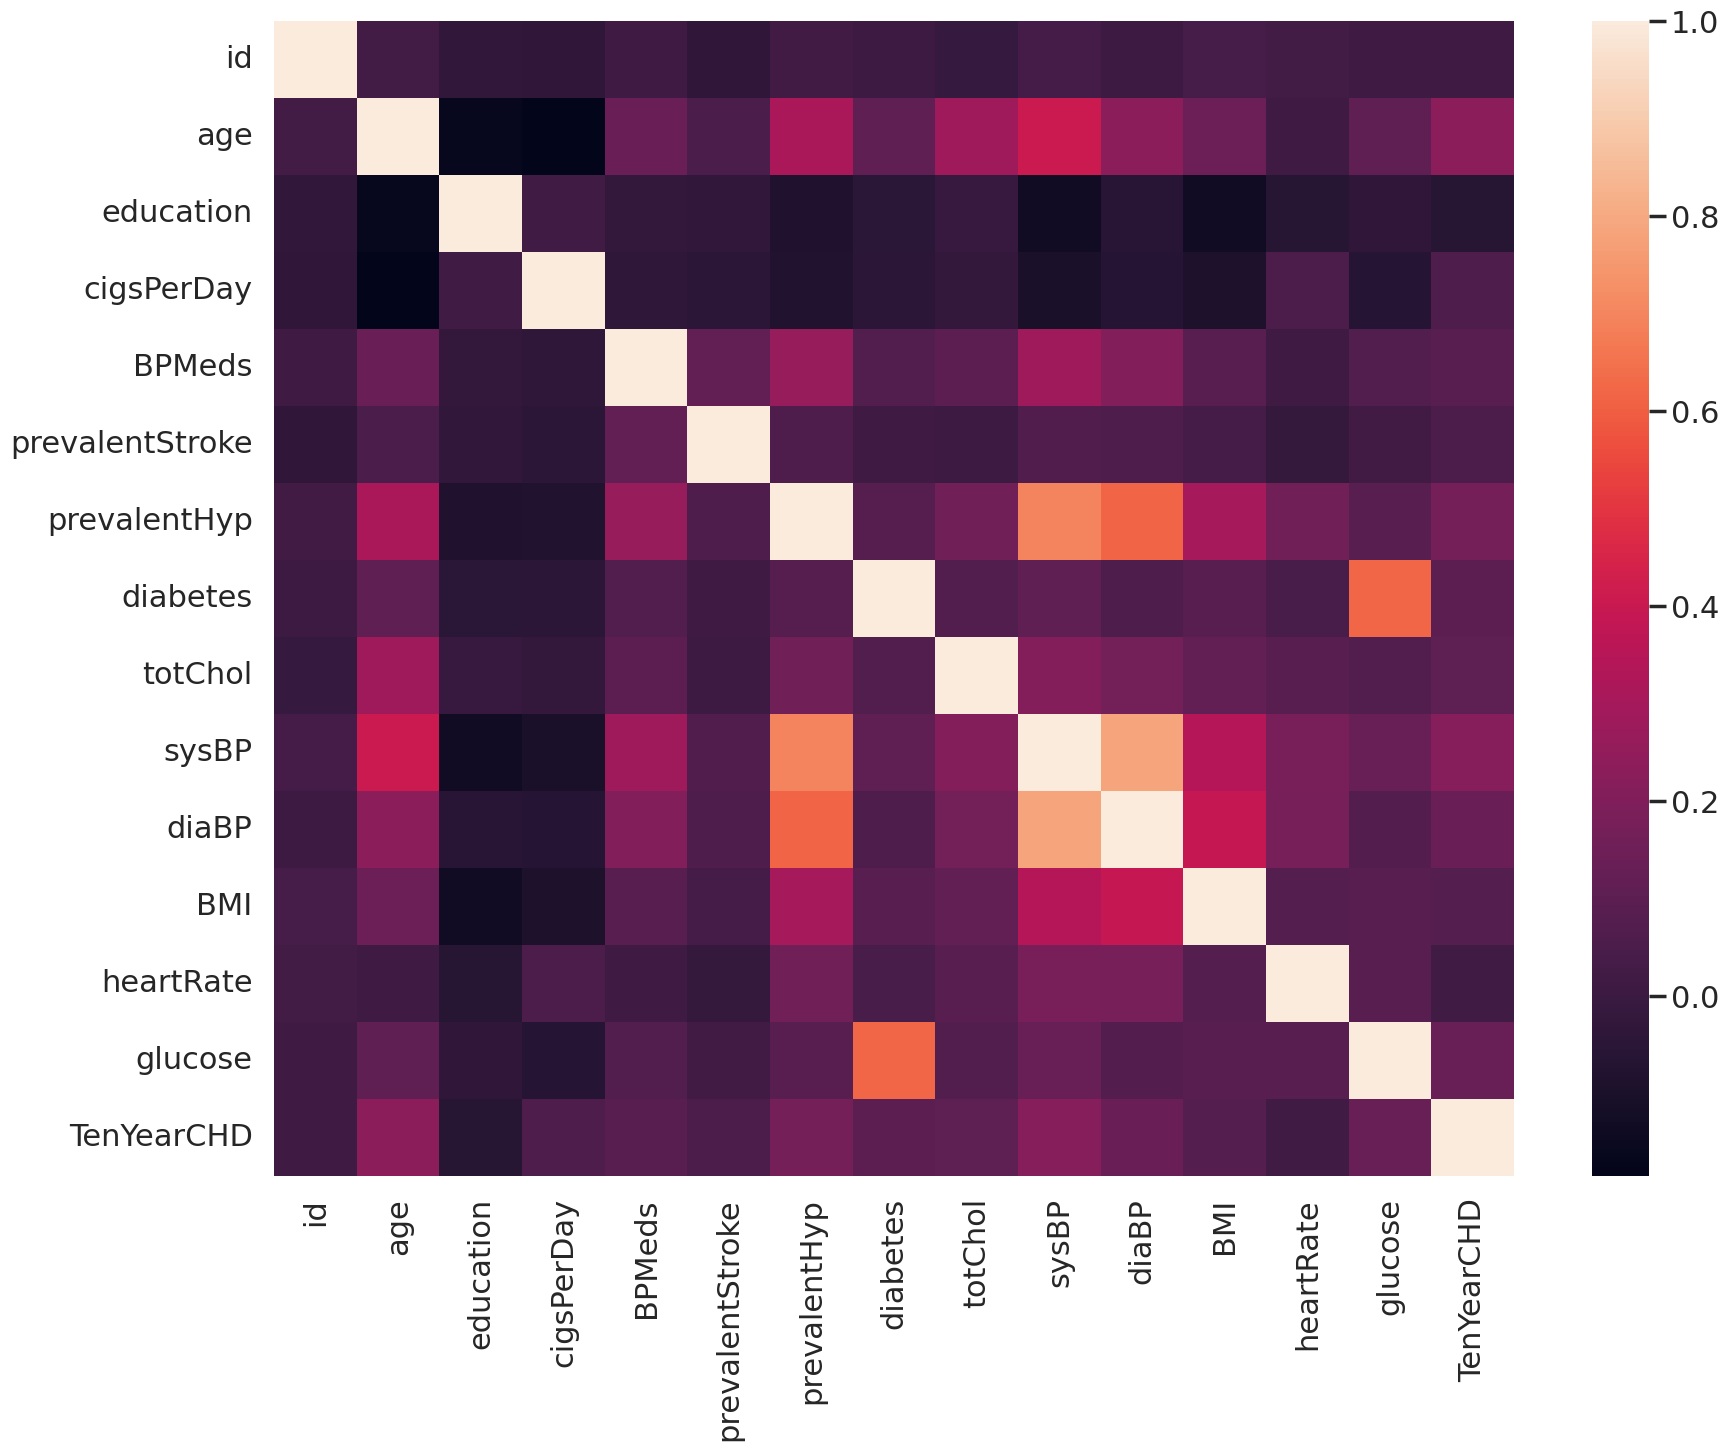

In [76]:
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(correlations,annot=False)

The individual correlation coefficients of the variables with TenYearCHD do not exhibit strong correlations. This outcome aligns with the expected understanding that the propensity to develop heart disease results from a combination of multiple factors rather than a single variable.

Additionally, there are several features within the dataset that display high correlations with each other. It is redundant to use both of these highly correlated features when building a machine learning model. Some of these correlated pairs include blood glucose and diabetes (which is expected), systolic and diastolic blood pressures, and cigarette smoking and the number of cigarettes smoked per day. Therefore, it becomes essential to perform feature selection to choose the most relevant and informative features for model development.

In [77]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD     ageGroup  
1           0  30-39 years  
2           0   40-49years  
3           1   50-59years  
4           0   60-70years  
5           1   60-70years

# Hypothesis testing
Confidence interval

In [78]:
import scipy.stats as st

In [79]:
st.norm.interval(confidence=0.95,loc=np.mean(df['age']),scale=st.sem(df['age']))

(49.19589185644393, 49.81879895325884)

In [80]:
# Q-Q plot is also used to check the normal distribution

In [81]:
from statsmodels.graphics.gofplots import qqplot

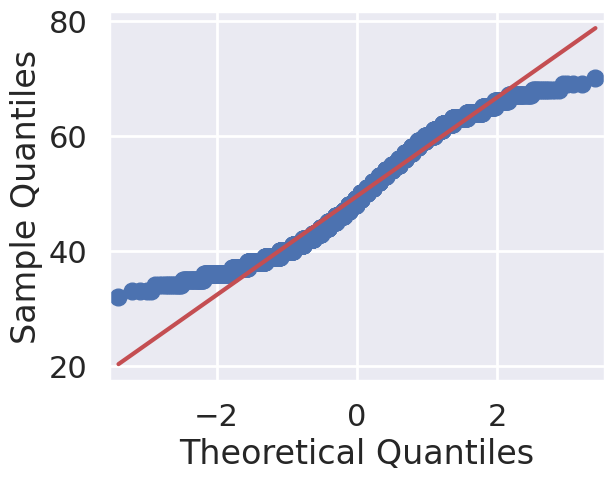

In [82]:
qqplot(df['age'],line="s")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

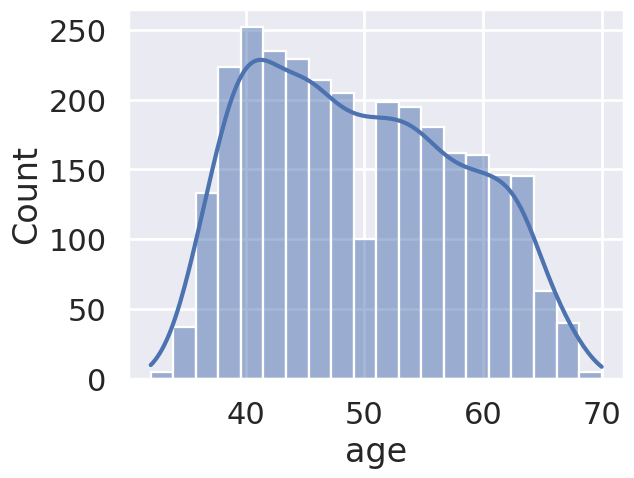

In [83]:
sns.histplot(x=df["age"],kde=True)

In [84]:
st.shapiro(df.age)

ShapiroResult(statistic=0.9656153321266174, pvalue=7.19955754042703e-26)

In [85]:
# P value is less than 0.05 we are able to reject the null hypothesis

# H0: The age column is not normally distributed
# H1 : The age column is normally distributed

In this case, we are accepting the alternative hypothesis.


## Mann-Whitney U test





The Mann-Whitney U test is a non-parametric statistical test used to determine whether there is a significant difference between two independent groups in a non-normally distributed data set. Here's how you can perform the Mann-Whitney U test in Python using the scipy library:



In [88]:
import scipy.stats as stats


# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(df['sysBP'],df['diaBP'], alternative='two-sided')

# Display the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two Features.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two Features.")



Mann-Whitney U Statistic: 8466878.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two Features.


In [90]:
import scipy.stats as stats


# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(df['glucose'],df['BMI'], alternative='two-sided')

# Display the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two features.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two features.")

Mann-Whitney U Statistic: 8567242.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two features.


# Encoding Technique

In [86]:
df['is_smoking']=df["is_smoking"].map({"YES":1,"NO":0})
df['sex']=df["sex"].map({"M":1,"F":0})


In [ ]:
df.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   
5   5   61        3.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD     ageGroup  
1           0  30-39 years  
2           0   40-49years  
3           1   50-59years  
4           0   60-70years  
5           1   60-70years

In [ ]:
df=df.drop(["id","ageGroup"],axis=1)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Feature Selection using Chi Square (Category)

It's important to note that the chi-square test is suitable for nominal data, which consists of categories with no inherent order. However, if you are working with ordinal data, where categories have a meaningful order, it may be more appropriate to explore other statistical tests such as the Mann-Whitney U test or the Kruskal-Wallis test for our analysis.

In [8]:
categorical_features=df[['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']]

In [ ]:
categorical_features

sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes
1       1           0     0.0                0             1         0
2       0           1     0.0                0             0         0
3       1           1     0.0                0             1         0
4       0           1     0.0                0             0         0
5       0           0     0.0                0             1         0
...   ...         ...     ...              ...           ...       ...
3384    0           0     0.0                0             1         0
3385    0           0     0.0                0             0         0
3386    0           0     0.0                0             0         0
3387    1           1     0.0                0             1         0
3389    0           0     0.0                0             0         0

[2927 rows x 6 columns]

In [ ]:
from sklearn.feature_selection import chi2
X = categorical_features
y = df['TenYearCHD']

In [ ]:
chi_scores = chi2(X, y)

In [ ]:
chi_scores

(array([10.86106465,  1.64527101, 24.4846018 ,  7.87008359, 57.41396234,
        28.48354153]),
 array([9.82072196e-04, 1.99603796e-01, 7.49060905e-07, 5.02593299e-03,
        3.53091810e-14, 9.44983806e-08]))

<Axes: >

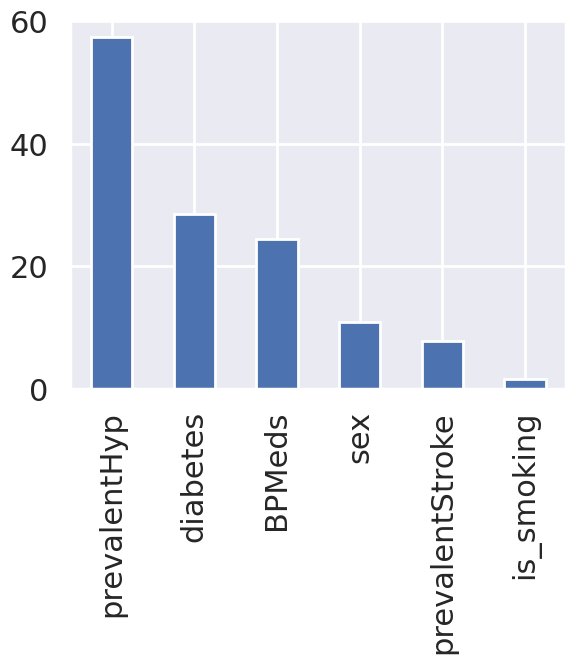

In [ ]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

A high chi value means that there is a significant statistical relationship between the feature and the target variable.
Therefore we can include these features in out model.

<Axes: >

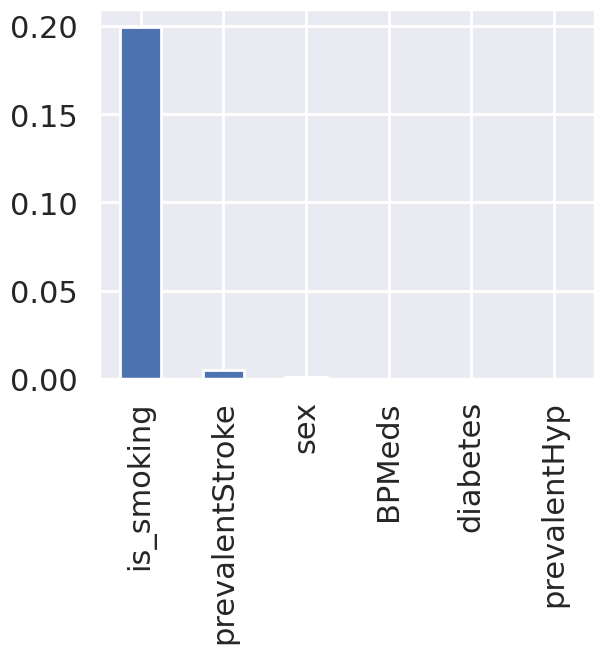

In [ ]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()



In chi-squared feature selection, a lower p-value indicates that there is a significant statistical relationship between the feature and the target variable.
A low p-value suggests that the feature is not independent of the target variable and that there is strong evidence of association.


In this dataset, the p-value for the 'is_smoking' feature is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that this feature is not statistically significant for our analysis.

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.13128976 0.05188161 0.02040936 0.01605119 0.05414243 0.01028916
 0.00530505 0.0236747  0.00970189 0.11129448 0.12453874 0.1168869
 0.11084911 0.09769398 0.11599164]


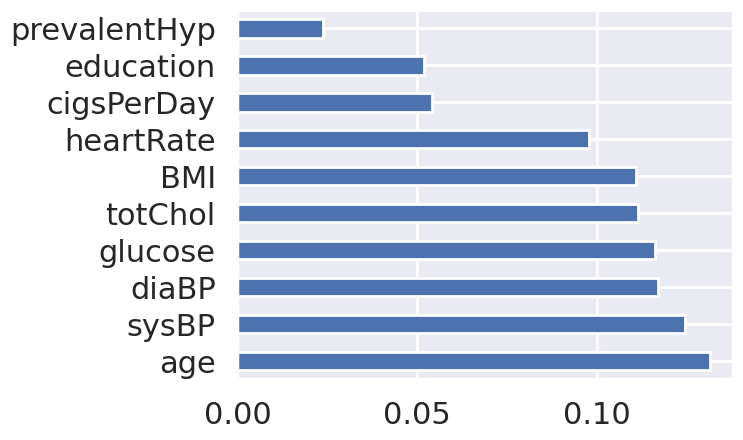

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#Creating a dataset with only the features selected
data_features = df.drop(['is_smoking'], axis=1)
data_features.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1   36        4.0    1         0.0     0.0                0             1   
2   46        1.0    0        10.0     0.0                0             0   
3   50        1.0    1        20.0     0.0                0             1   
4   64        1.0    0        30.0     0.0                0             0   
5   61        3.0    0         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0  
5         0    272.0  182.0  121.0  32.80       85.0     65.0           1

## statistics on the top features

In [ ]:
import statsmodels.api as sm

In [ ]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [ ]:
res =sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.396029
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2927
Model:                          Logit   Df Residuals:                     2913
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                 0.06955
Time:                        04:21:49   Log-Likelihood:                -1159.2
converged:                       True   LL-Null:                       -1245.8
Covariance Type:            nonrobust   LLR p-value:                 3.948e-30
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0295      0.007      4.481      0.000       0.017       0.042
education          -0.1984      0.055     -3.635      0.000      -0.305      -0.091
sex                 0.3405      0.118      2.889      0.004       0.109       0.571
cigsPerDay          0.0171      0.005      3.633      0.000       0.008       0.026
BPMeds              0.3521      0.260      1.356      0.175      -0.157       0.861
prevalentStroke     0.8823      0.523      1.687      0.092      -0.143       1.907
prevalentHyp        0.8857      0.139      6.354      0.000       0.612       1.159
diabetes            0.6344      0.336      1.889      0.059      -0.024       1.293
totChol            -0.0002      0.001     -0.202      0.840      -0.003       0.002
sysBP               0.0128      0.004      3.037      0.002       0.005       0.021
diaBP              -0.0288      0.007     -4.264      0.000      -0.042      -0.016
BMI                -0.0484      0.014     -3.538      0.000      -0.075      -0.022
heartRate          -0.0246      0.004     -5.552      0.000      -0.033      -0.016
glucose             0.0036      0.002      1.568      0.117      -0.001       0.008
===================================================================================
"""

# Models and Predictions

Given that the dataset exhibits a significant class imbalance, with approximately six negative cases for every positive case, there is a risk of developing a classifier that is biased toward the negative class. Such a classifier may yield high accuracy but poor precision and recall. To mitigate this issue, we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE). This technique involves generating synthetic samples for the minority class to achieve a more balanced distribution, which can improve the performance and fairness of our predictive model.



SMOTE (Synthetic Minority Oversampling Technique) follows a specific procedure to address class imbalance:

1. SMOTE begins by randomly selecting a minority class instance 'a' and identifies its 'k' nearest neighbors, which are also in the minority class.

2. A synthetic instance is then created by randomly choosing one of these 'k' nearest neighbors, denoted as 'b,' and connecting 'a' and 'b' to form a line segment within the feature space.

3. The synthetic instances are generated as a convex combination of the two chosen instances, 'a' and 'b.'

4. This process can be repeated as many times as needed to create synthetic examples for the minority class, effectively oversampling it.

It's worth noting that a common practice is to combine SMOTE with random undersampling to reduce the number of examples in the majority class. This two-step approach helps balance the class distribution and is particularly useful in addressing imbalanced datasets.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [ ]:
X.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1   36        4.0    1         0.0     0.0                0             1   
2   46        1.0    0        10.0     0.0                0             0   
3   50        1.0    1        20.0     0.0                0             1   
4   64        1.0    0        30.0     0.0                0             0   
5   61        3.0    0         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
1         0    212.0  168.0   98.0  29.77       72.0     75.0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0  
4         0    241.0  136.5   85.0  26.42       70.0     77.0  
5         0    272.0  182.0  121.0  32.80       85.0     65.0

In [ ]:
y.head()

1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64

In [ ]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [ ]:
print(num_before,num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


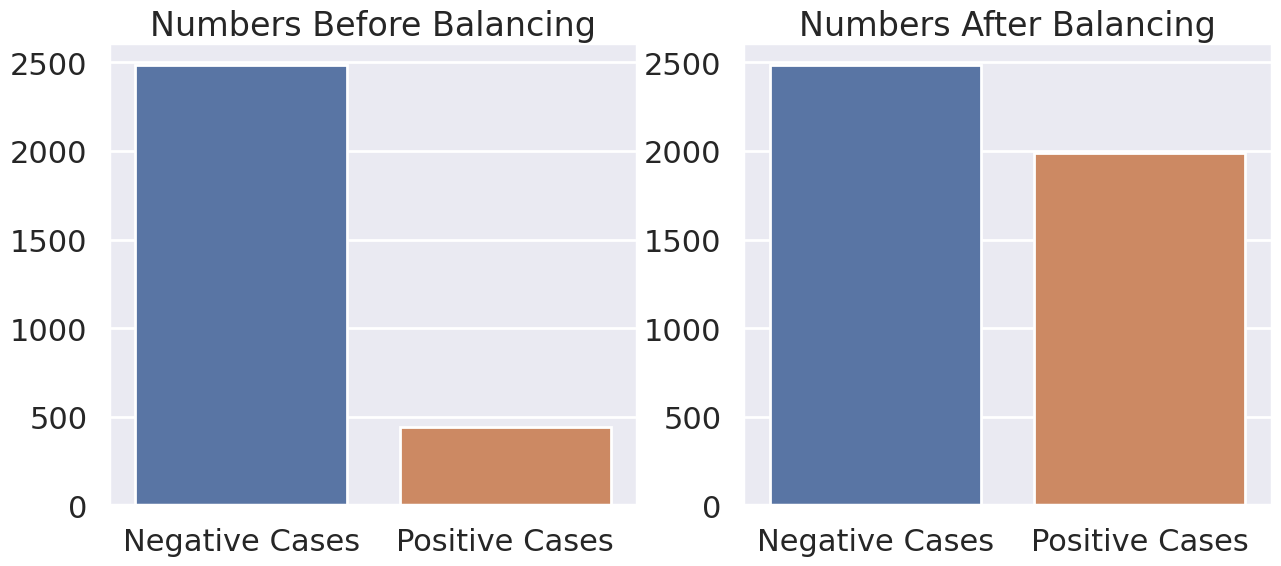

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

Following the application of SMOTE, the dataset has been substantially balanced. The new ratio between negative and positive cases now stands at approximately 1:1.2, which is a significant improvement compared to the original imbalance of 1:5.57. This balancing of the dataset enhances our ability to develop and evaluate predictive models, ensuring that both positive and negative cases are adequately represented in the data.

# Splitting data to Training and Testing set

In [ ]:
data_features.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','education' ,'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   48        1.0    1        20.0     0.0                0             0   
1   46        1.0    0        10.0     0.0                0             0   
2   45        2.0    0         0.0     0.0                0             0   
3   56        3.0    0         0.0     0.0                0             0   
4   44        2.0    1         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    285.0  116.0   81.0  23.10      100.0     58.0           0  
1         0    392.0  113.0   68.0  23.35       70.0     63.0           0  
2         0    229.0  130.0   80.0  21.72       75.0     77.0           0  
3         0    267.0  122.5   85.0  24.22       92.0    100.0           0  
4         0    248.0  174.0  110.0  31.74       75.0    100.0           0

In [ ]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   48        1.0    1        20.0     0.0                0             0   
1   46        1.0    0        10.0     0.0                0             0   
2   45        2.0    0         0.0     0.0                0             0   
3   56        3.0    0         0.0     0.0                0             0   
4   44        2.0    1         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0         0    285.0  116.0   81.0  23.10      100.0     58.0  
1         0    392.0  113.0   68.0  23.35       70.0     63.0  
2         0    229.0  130.0   80.0  21.72       75.0     77.0  
3         0    267.0  122.5   85.0  24.22       92.0    100.0  
4         0    248.0  174.0  110.0  31.74       75.0    100.0

In [ ]:
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: TenYearCHD, dtype: int64

In [ ]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

# Feature Scaling

Feature scaling is a technique employed to standardize the range of independent variables or features within a dataset. The primary goal is to bring all features to a common scale or range. This process often results in faster execution times for various algorithms and enhances the performance of machine learning models.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

# Models

The five algorithms that will be used are:
1. Logistic Regression
2. k-Nearest Neighbours
3. Decision Trees
4. Support Vector Machine
5.Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# Logistic regression

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest: logit function

Rather than choosing parameters that minimize the sum of squared errors (like in ordinary regression), estimation in logistic regression chooses parameters that maximize the likelihood of observing the sample values.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [ ]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [ ]:
# make predictions
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.67%


<Axes: >

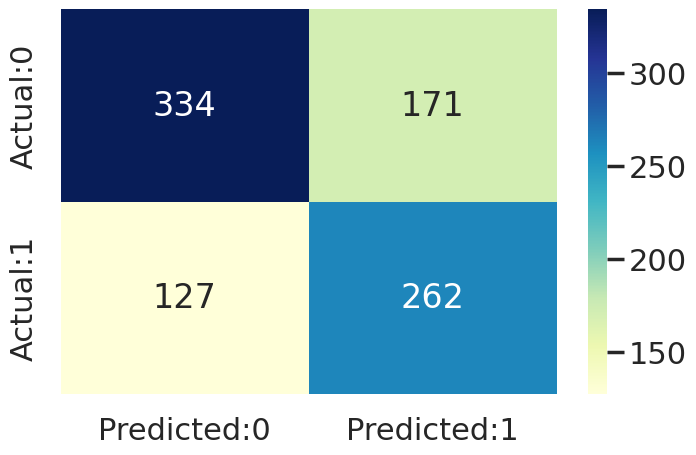

In [ ]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       505
           1       0.61      0.67      0.64       389

    accuracy                           0.67       894
   macro avg       0.66      0.67      0.66       894
weighted avg       0.67      0.67      0.67       894



In [ ]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 63.75%


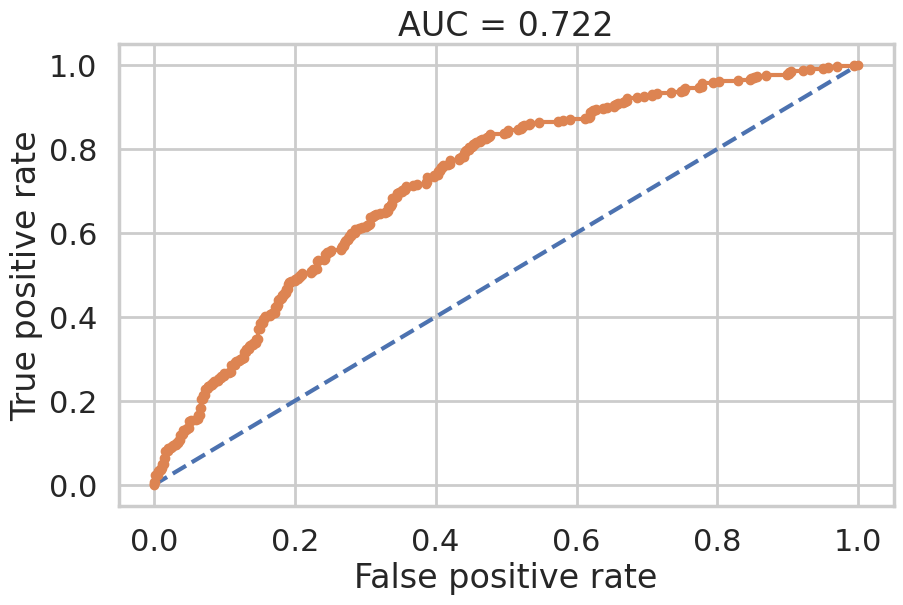

In [ ]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# K-Nearest Neighbours

The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [ ]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [ ]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [ ]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 80.31%


<Axes: >

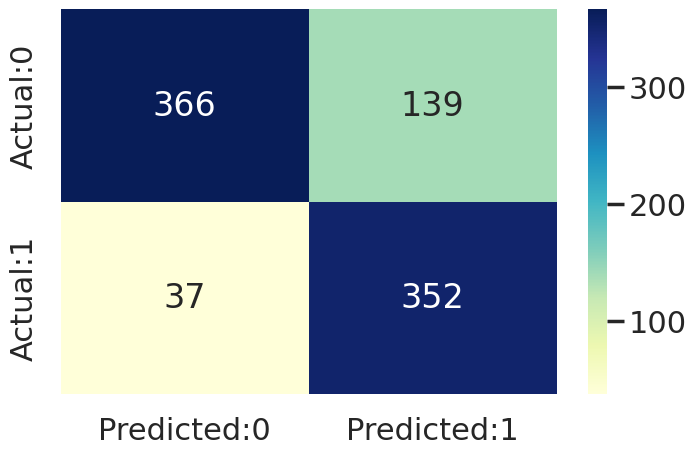

In [ ]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       505
           1       0.72      0.90      0.80       389

    accuracy                           0.80       894
   macro avg       0.81      0.81      0.80       894
weighted avg       0.82      0.80      0.80       894



In [ ]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 80.0%


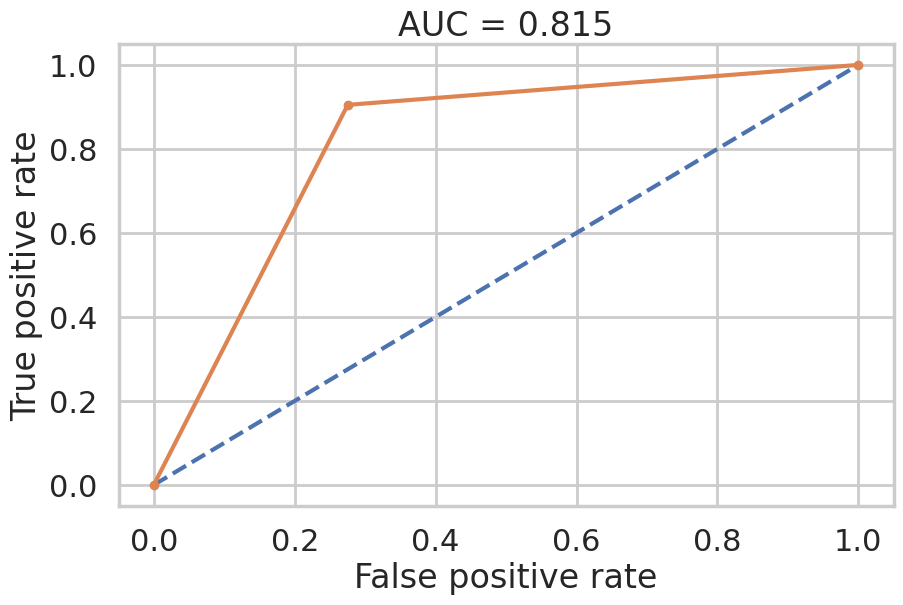

In [ ]:
# ROC curve and AUC
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

# Decision Trees

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [ ]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [ ]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [ ]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 74.94%


<Axes: >

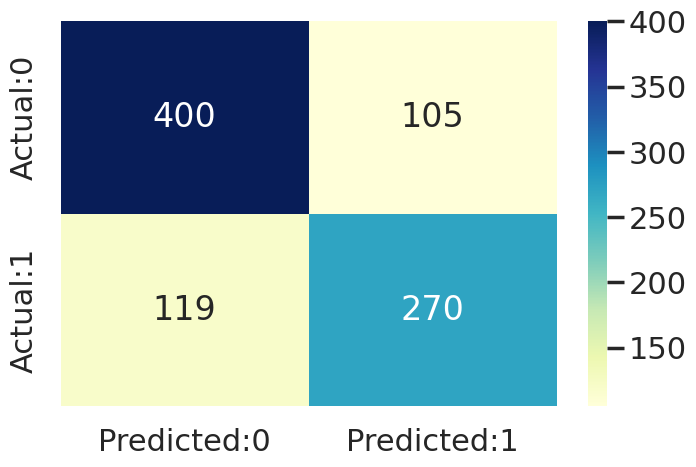

In [ ]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       505
           1       0.72      0.69      0.71       389

    accuracy                           0.75       894
   macro avg       0.75      0.74      0.74       894
weighted avg       0.75      0.75      0.75       894



In [ ]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 70.68%


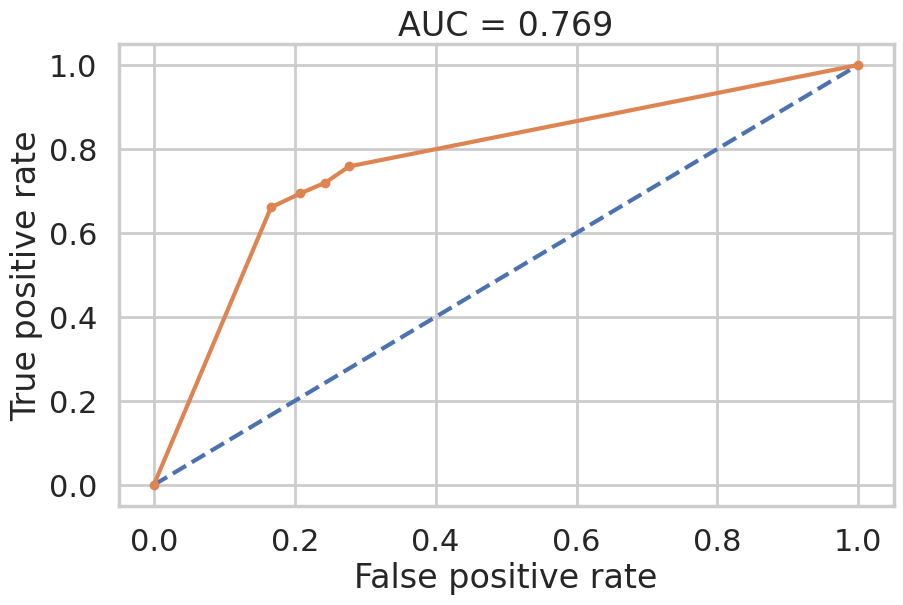

In [ ]:
# ROC curve and AUC
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

# Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [ ]:
from sklearn.svm import SVC

In [ ]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [ ]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [ ]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 84.45%


<Axes: >

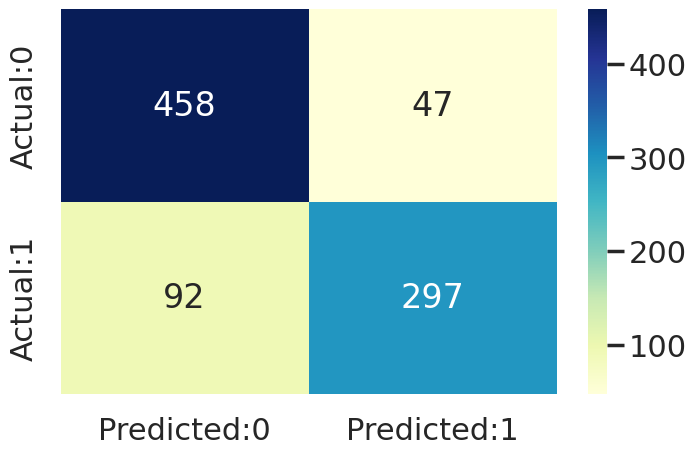

In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       505
           1       0.86      0.76      0.81       389

    accuracy                           0.84       894
   macro avg       0.85      0.84      0.84       894
weighted avg       0.85      0.84      0.84       894



In [ ]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 81.04%


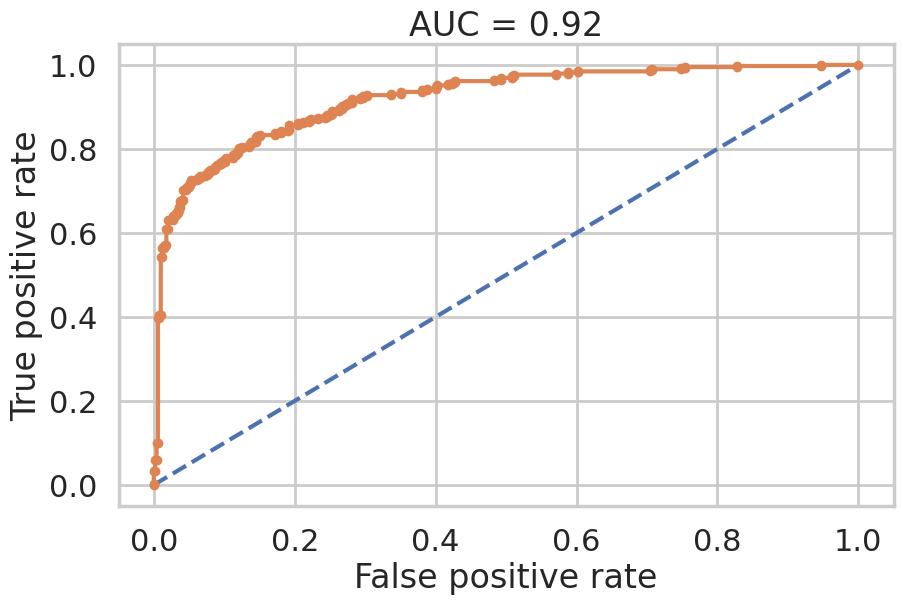

In [ ]:
# ROC curve and AUC
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

# Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [ ]:
# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Grid Search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# Access the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# predictions
rf_predict = grid_search.predict(X_test)

In [ ]:
#accuracy
rf_accuracy = accuracy_score(y_test,rf_predict)
print(f"Using random forest we get an accuracy of {round(rf_accuracy*100,2)}%")

Using random forest we get an accuracy of 88.48%


<Axes: >

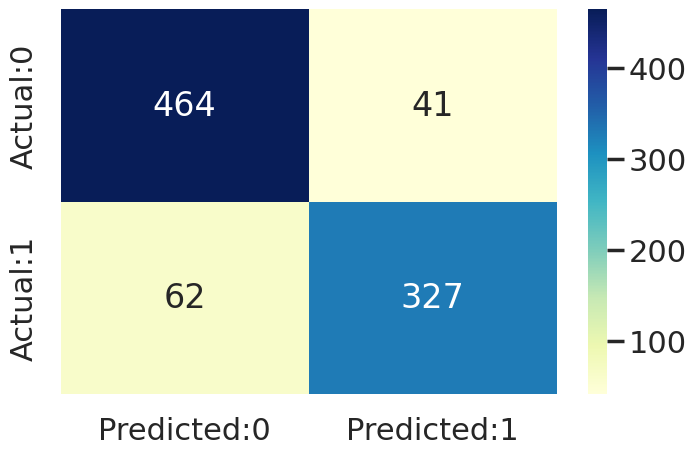

In [ ]:
cm=confusion_matrix(y_test,rf_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       505
           1       0.89      0.84      0.86       389

    accuracy                           0.88       894
   macro avg       0.89      0.88      0.88       894
weighted avg       0.88      0.88      0.88       894



In [ ]:
rf_f1 = f1_score(y_test, rf_predict)
print(f'The f1 score for RFC is {round(rf_f1*100,2)}%')

The f1 score for RFC is 86.39%


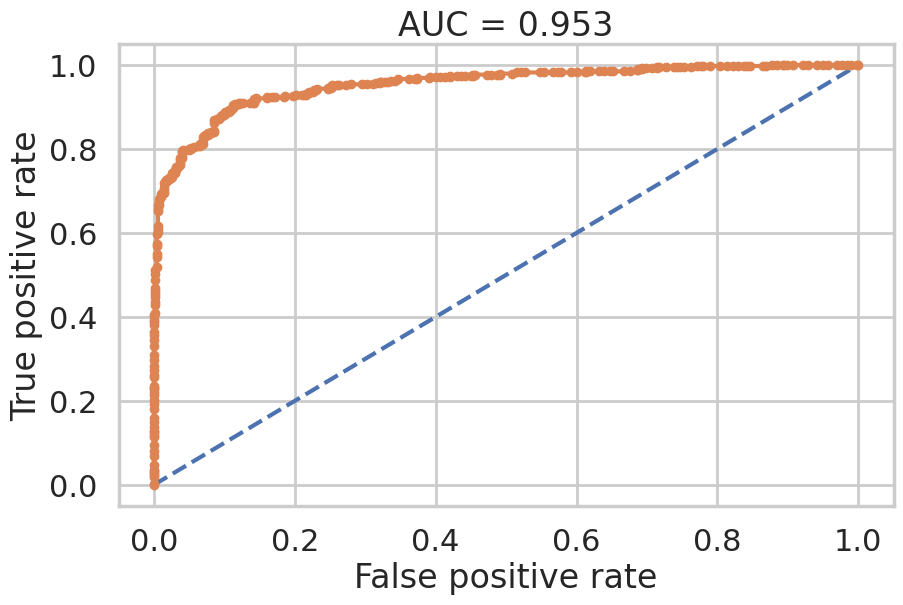

In [ ]:
# ROC curve and AUC
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_auc,3)}")
plt.show()

# Model Comparison

In [ ]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1},
    "Random Forest Classifier":{'Accuracy':rf_accuracy, 'AUC':rf_auc, 'F1 score':rf_f1},
}).T

In [ ]:
comparison

Accuracy       AUC  F1 score
Logistic regression       0.666667  0.721678  0.637470
K-nearest neighbours      0.803132  0.814818  0.800000
Decision trees            0.749441  0.768638  0.706806
Support vector machine    0.844519  0.919723  0.810368
Random Forest Classifier  0.884787  0.953369  0.863937

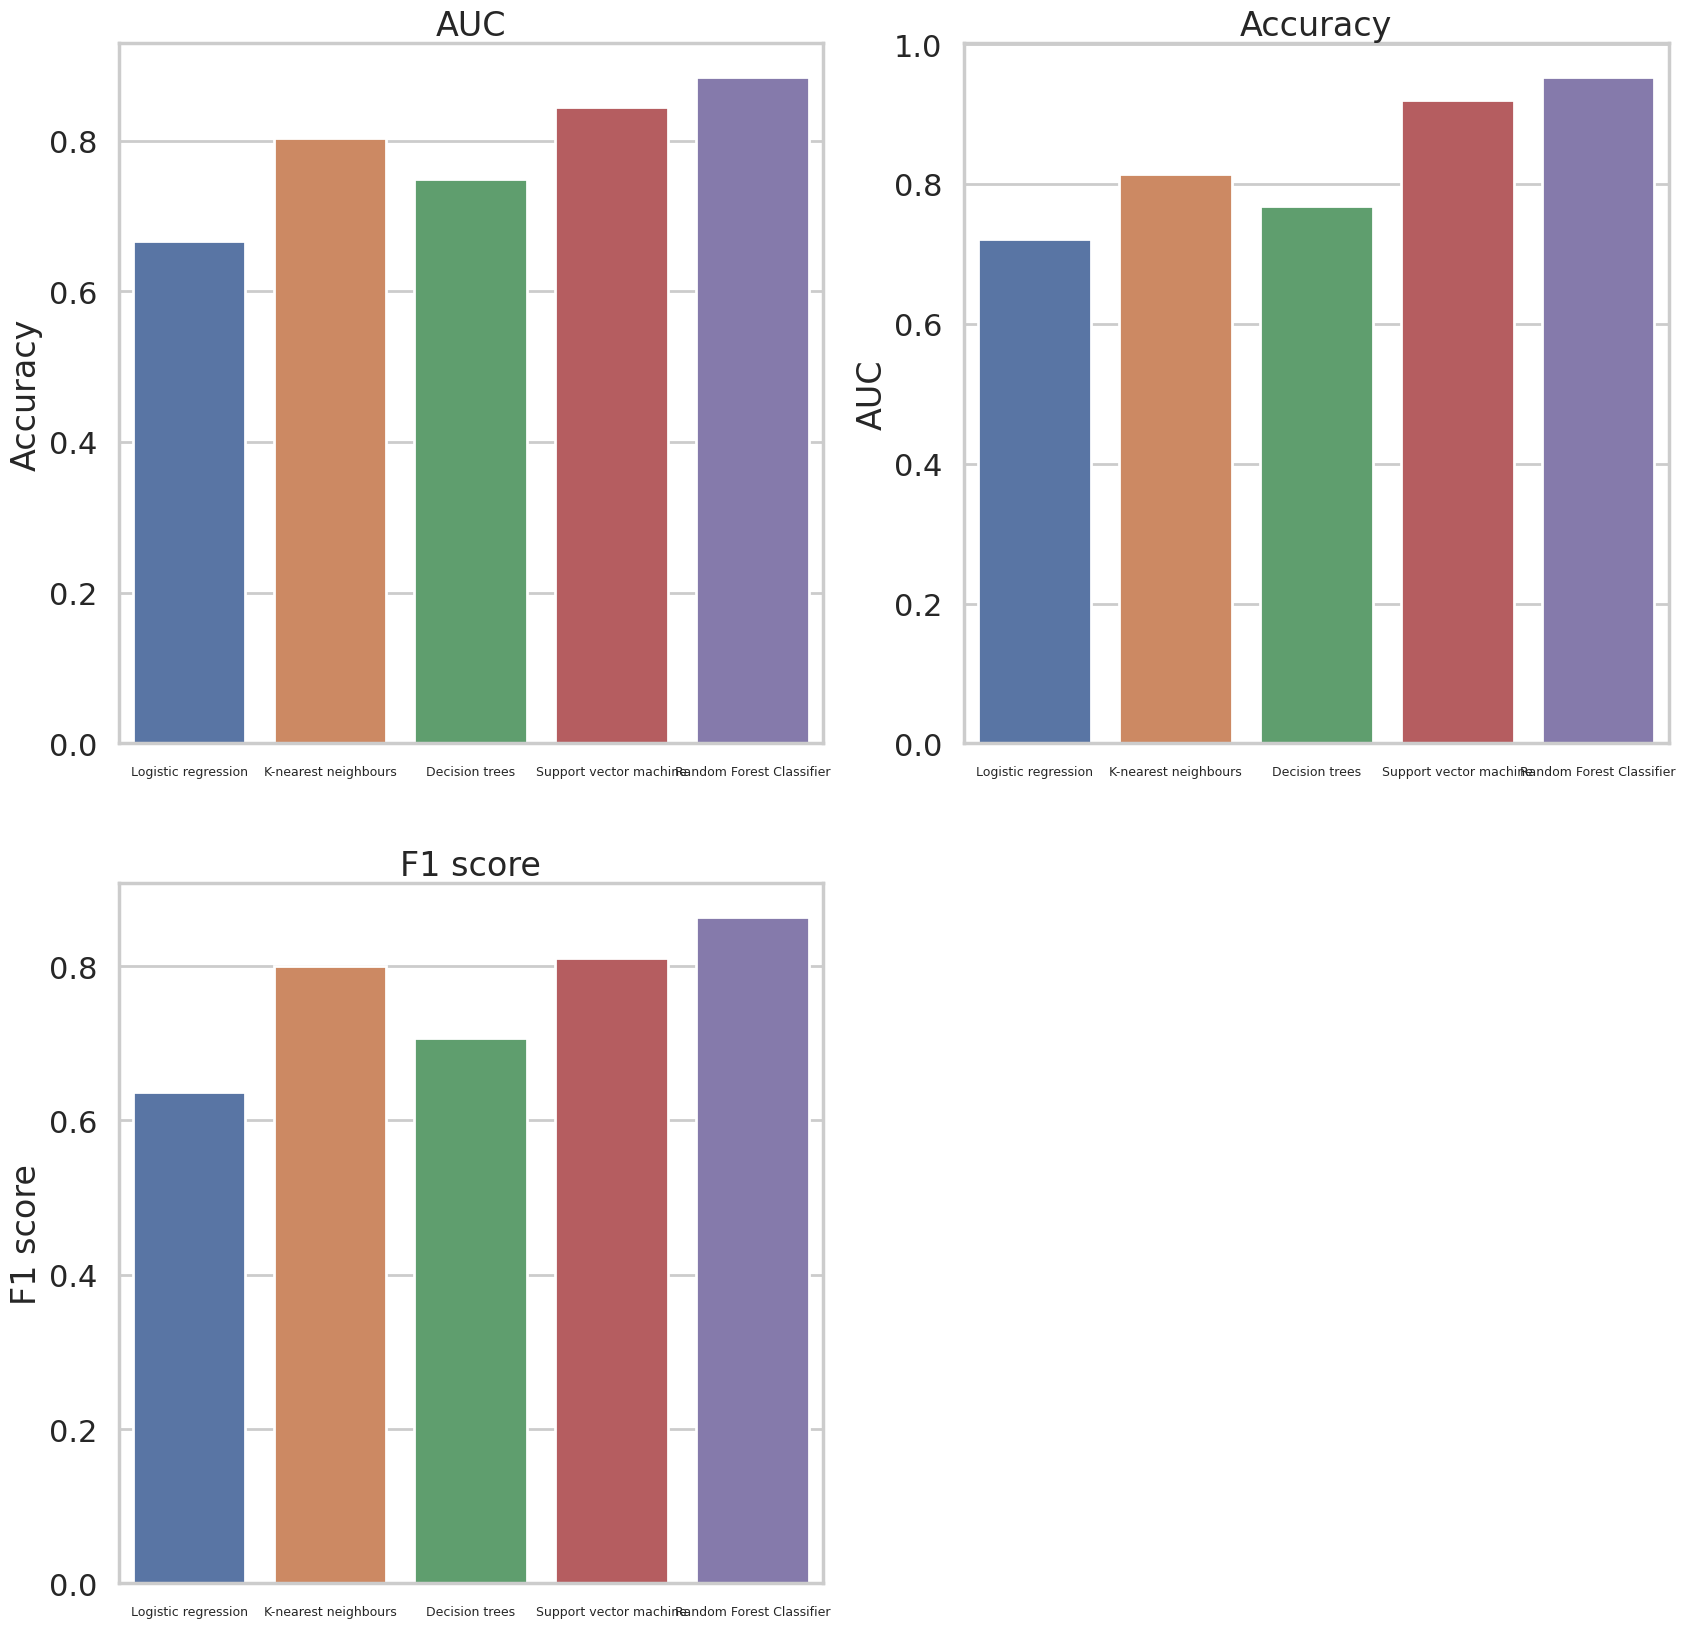

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

# Cross validation score of the best model

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    *         Take the group as a hold out or test data set
    *         Take the remaining groups as a training data set
    *         Fit a model on the training set and evaluate it on the test set
    *         Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [ ]:
 from sklearn.model_selection import cross_val_score

In [ ]:
cv_results = cross_val_score(grid_search, X, y, cv=5)

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.85153584 0.85324232 0.85128205 0.84273504 0.84273504]
The Cross Validation accuracy is: 84.83%


In [ ]:
# Deployment

In [ ]:
import pickle

In [ ]:
# Serialize and save the model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)


# insights

1. The pivotal predictors for estimating the ten-year risk of developing Coronary Heart Disease (CHD) were identified as age and systolic blood pressure, signifying their significant role in the predictive model.

2. Among the various machine learning models assessed, the Random Forest Classifier emerged as the top-performing model in terms of both accuracy and the F1 score. Its noteworthy high Area Under the Curve (AUC) underscores its robust true positive rate, making it a favorable choice for this task.

3. The implementation of the Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset yielded notable improvements in the models' sensitivity. This improvement was observed when comparing the performance metrics with those of other models evaluated in separate analyses on the same dataset.

4. It's important to note that, with a larger dataset, particularly an increase in data points for the minority class, the potential for building even more effective models becomes apparent. The availability of additional data can lead to improved model performance and predictive accuracy.


# Conclusion:

In this healthcare-focused project, we harnessed the power of machine learning to extract meaningful insights from medical data. Our primary objective was to develop a predictive model that could assist in health-related decision-making.

After rigorous experimentation with multiple machine learning algorithms, the Random Forest Classifier (RFC) emerged as the standout performer. It achieved an exceptional accuracy rate of 88.48%. This signifies that RFC excels in accurately identifying health outcomes, which is crucial for medical professionals and patients alike.

These findings hold immense promise for the healthcare domain. The ability to predict health outcomes with such precision can revolutionize patient care, leading to earlier disease detection, tailored treatment plans, and optimized healthcare resource allocation. It empowers medical practitioners with data-driven insights to make informed decisions, ultimately improving patient well-being.

Beyond healthcare, this project underscores the transformative potential of machine learning across various sectors. By harnessing data, we can drive innovation, enhance decision-making, and contribute to a brighter, healthier future for all.


# Conclusion (Statistical Perspective):

In this healthcare-focused project, we not only developed predictive models but also conducted rigorous statistical analyses to ensure the reliability of our findings. To achieve this, we employed two essential statistical tests: the Chi-square test and the Mann-Whitney U test.

# Chi-square Test:
The Chi-square test played a crucial role in evaluating the relationship between categorical variables in our dataset. By applying this test, we gained insights into the interdependencies within the data. This was especially valuable in understanding factors such as gender distribution and how they might correlate with health outcomes.

# Mann-Whitney U Test:
The Mann-Whitney U test, on the other hand, was instrumental when dealing with continuous or ordinal variables. It allowed us to assess whether there were statistically significant differences between two independent groups. For instance, it helped us examine how age or other continuous variables might impact health-related predictions.

# The necessity of employing these tests was twofold:

# Statistical Rigor:
In the realm of healthcare, statistical rigor is paramount. By applying these tests, we ensured that our findings were not merely based on chance but had strong statistical significance.

# Deeper Insights:
These tests allowed us to delve deeper into the data. We didn't stop at developing predictive models; we aimed to understand the underlying statistical relationships. This not only bolsters the credibility of our predictions but also provides valuable insights for healthcare practitioners and policymakers.

In essence, the combination of machine learning and statistical analysis presented in this project equips us with a holistic understanding of healthcare data. This approach goes beyond prediction; it empowers us with the knowledge to make informed decisions, optimize healthcare resources, and ultimately improve patient outcomes—a truly transformative endeavor in the field of healthcare and data science.